# s27: Rebenchmarking test cases from s18 with DECSKS-2.3 (cell-centered grid)

We paste the intro from s18 here which outlines some fo the simulations

<ul>
<li>s07-01: Landau damping on periodic-periodic grid (Fourier, F21, O6-4) -- DECSKS-1.2 used, one species solver
<li>s07-02: Landau damping on periodic-periodic grid (Fourier, F21, O11-6) -- DECSKS-1.2 used, one species solver
<li>NEW: strong landau damping
<li>NEW: two stream instability
<li>s07-03 - s07-05: Landau damping on periodic-periodic grid (FD) -- DECSKS-1.2 used, one species solver
<li>s17-01: Bump on tail instability  -- DECSKS-2.0 used, 2 species solver
<li>s18-07: collector-collector problem with cosine 22 blobs -- DECSKS-2.0 used, 2 species solver -- Check that total energy is conserved, or use s18-16 as the simulation to test
</ul>

We proceed with the simulations and results.

## s07-01 and s07-02: Weak (linear) Landau damping, F21 solver; $x$-periodic, $v_x$-periodic

input decks:

<a href = "insert url">params_s07-01.dat</a>
<a href = "insert url">params_boundaryconditions_s07-01.dat</a>
<a href = "insert url">params_output_s07-01.dat</a>

<a href = "insert url">params_s07-02.dat</a>
<a href = "insert url">params_boundaryconditions_s07-02.dat</a>
<a href = "insert url">params_output_s07-02.dat</a>

The initial density is: 

$$f_0(x,v_x) = \frac{1}{\sqrt{2\pi}}(1 + \varepsilon\cos (kx))\exp(-v^2 / 2)$$

where we have a long wavelength modulation with $k = 0.5$, and for weak nonlinearity we choose $\varepsilon = 0.01$ so that the linearization about $f_0 = \frac{1}{\sqrt{2\pi}} \exp (-v^2/2)$ is accurate.

We compare the redone simulations here (DECSKS-2.2) with that done in notebook DECSKS-07 (DECSKS-1.2). The quantities examined are:

<ol>
<li> $\ell^1$ norm: $I_1 = \sum_{ i,j}|f_{i,j}^n|\Delta x \Delta v$
<li> $\ell^2$ norm: $I_2 = \sqrt{\sum_{i,j}(f_{i,j}^n)^2\Delta x \Delta v}$
<li> Total energy $$I_W = \frac{1}{2}\sum_{i} \left(\sum_j f_{elec; i,j} v_{x,j}^2 \Delta v_x\right) \Delta x + \frac{\mu}{2}\sum_{i} \left(\sum_j f_{ion; i,j} v_{x,j}^2 \Delta v_x\right) \Delta x + \frac{1}{2}\sum_i E_{i}^2$$
<li> Entropy: $I_S = -\sum_{i,j}f_{i,j}^n \ln (f_{i,j}^n + \varepsilon ) \Delta x \Delta v$
</ol>

where $\mu = m_i / m_e$ is the term that ends up appearing in the total energy expression (note that $1 /\mu$ shows up in the actual Vlasov evolution equation itself). The factor of 1/2 is not necessary but included by preference as it is then symmetric to the expectations from particle by particle tracking where we have a quantity such as $1/2 mv^2 + 1/2 \varepsilon_0E^2$ being conserved, the factor of 1/2 in the Vlasov-Poisson conservation statement does not affect invariance, so this is our prerogative to include such a factor.

<b>Disclosure</b>: We do wish to compare results with DECSKS-1.2 which we emphasize was a one species solver existing on top of a constant cold ion background which has been benchmarked against other codes (hence is reliable). Its energy expression excepts the ion background contribution due to guaranteed uniformity (the fractional difference from one step to the next from the ions cancels identically when the background is not evolving but held constant), hence DECSKS-1.2 tracked $I_W = \frac{1}{2}\sum_{i} \left(\sum_j f_{elec; i,j} v_{x,j}^2 \Delta v_x\right) \Delta x + \frac{1}{2}\sum_i E_{i}^2$. <font color = "blue">For DECSKS-2.3 we have two species and should track the $I_W$ quantity as listed above including ions as above</font>

Additionally, we track the electrostatic energy $W_E$ whenever it is insightful: 

$$W_E = \sum_i \frac{1}{2}|E_{i}|^2 \Delta x$$

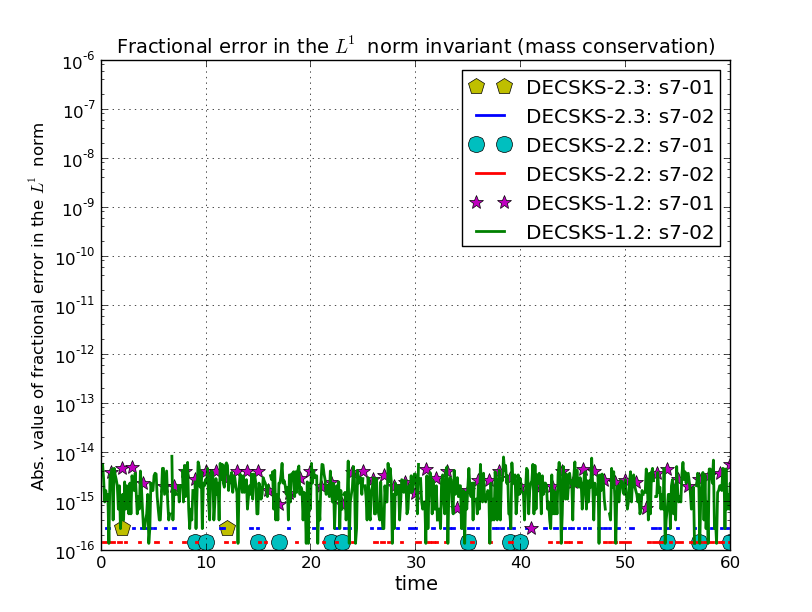

In [1]:
from IPython.display import Image
Image(filename='./fig/I1_s07_F21.png')

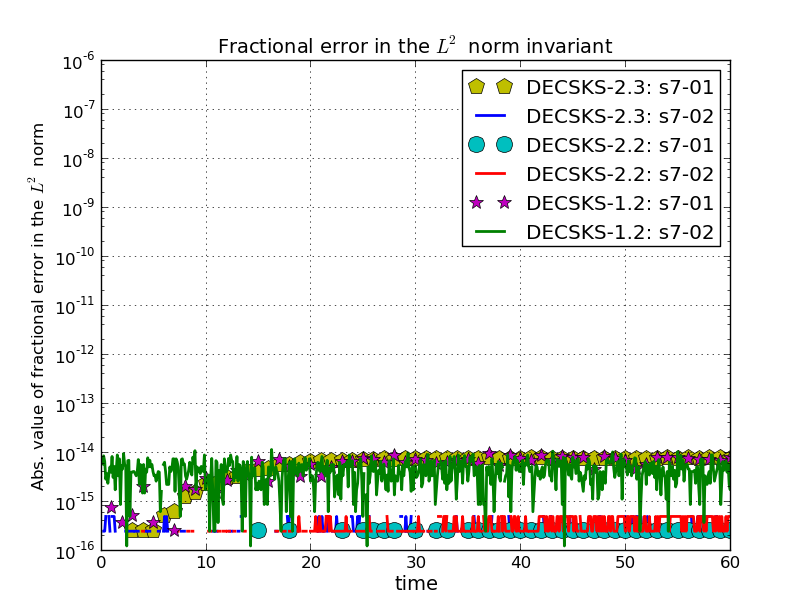

In [4]:
from IPython.display import Image
Image(filename='./fig/I2_s07_F21.png')

The newer version actually performs significantly better. The portions not plotted are regions where we (in the computation of the fraction error) have encountered $0.0 / 0.0$.

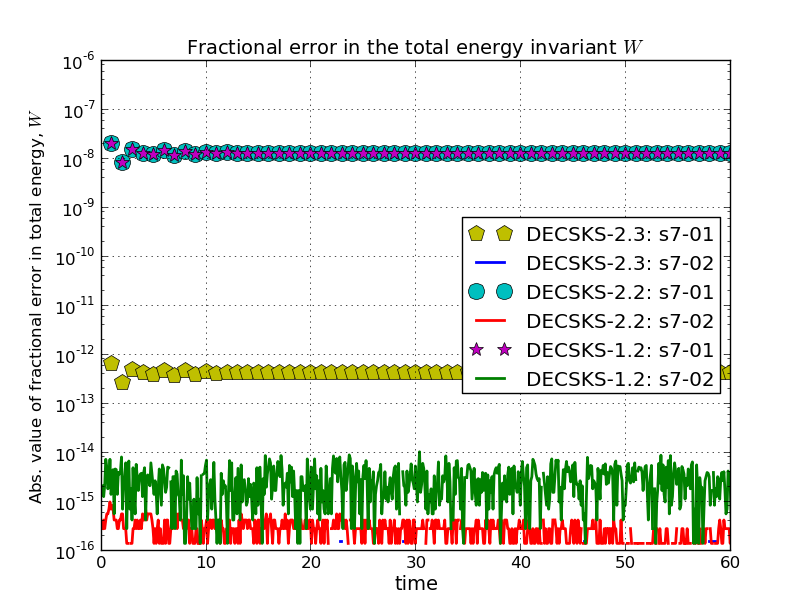

In [5]:
from IPython.display import Image
Image(filename='./fig/W_s07_F21.png')

ion contribution not included above

Again the newer version outperforms the old version, this time noticably for the finer mesh.

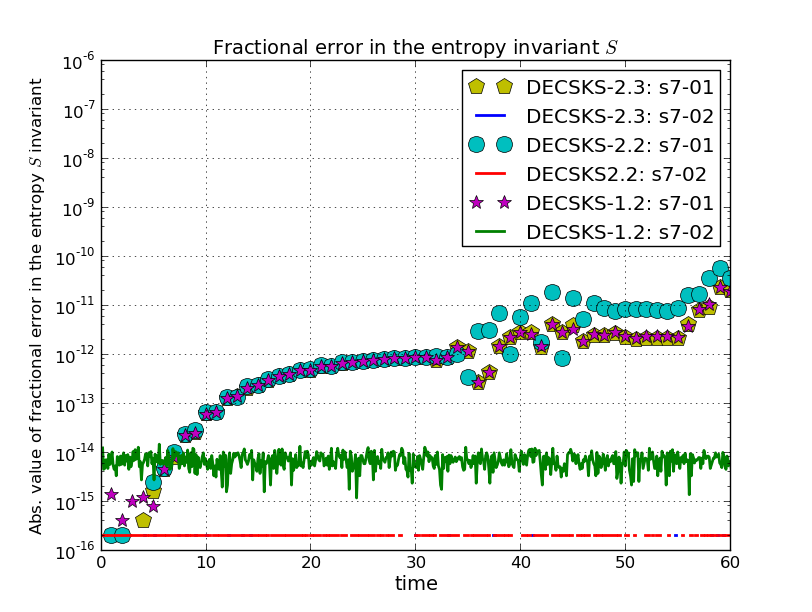

In [6]:
from IPython.display import Image
Image(filename='./fig/IS_s07_F21.png')

The entropy is a difficult quantity for numerical methods to conserve, we see for the coarse mesh we have some deviation but not by much (where this time the old version does happen to outperform the newer one). The newer version for a finer mesh significantly outperforms the older version on s07-02.

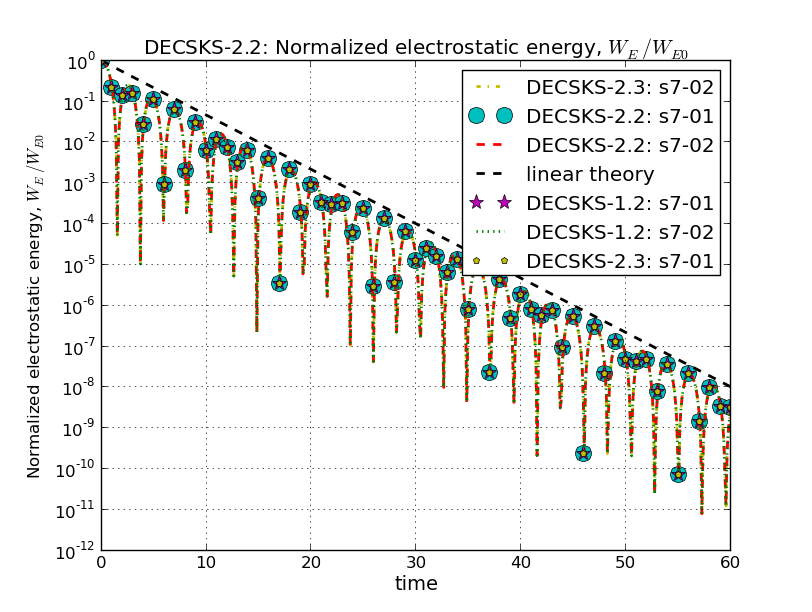

In [7]:
from IPython.display import Image
Image(filename='./fig/WE_s07_F21.png')

## TODO s07-03, s07-04, s07-05: Landau damping, FD7 solver

input decks:

<a href = "insert url">params_s07-03.dat</a>
<a href = "insert url">params_boundaryconditions_s07-03.dat</a>
<a href = "insert url">params_output_s07-03.dat</a>


<a href = "insert url">params_s07-04.dat</a>
<a href = "insert url">params_boundaryconditions_s07-04.dat</a>
<a href = "insert url">params_output_s07-04.dat</a>


<a href = "insert url">params_s07-05.dat</a>
<a href = "insert url">params_boundaryconditions_s07-05.dat</a>
<a href = "insert url">params_output_s07-05.dat</a>

We juxtapose these simulations in DECSKS-2.2 here, with the previous simulations from notebook DECSKS-07 which used DECSKS-1.2.

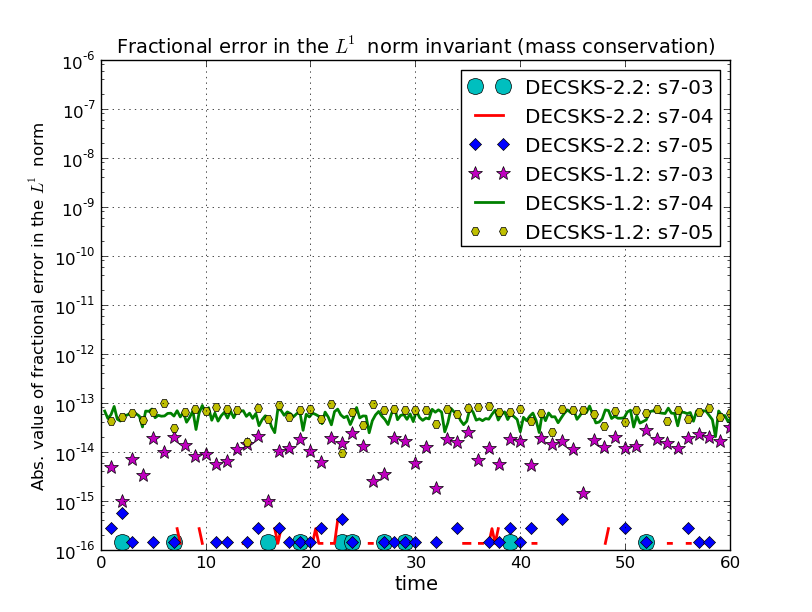

In [8]:
from IPython.display import Image
Image(filename='./fig/I1_FD7.png')

There is significant omitted data in the red plot, these correspond to zeroes and are not plotted as this is a logarithmic scale.

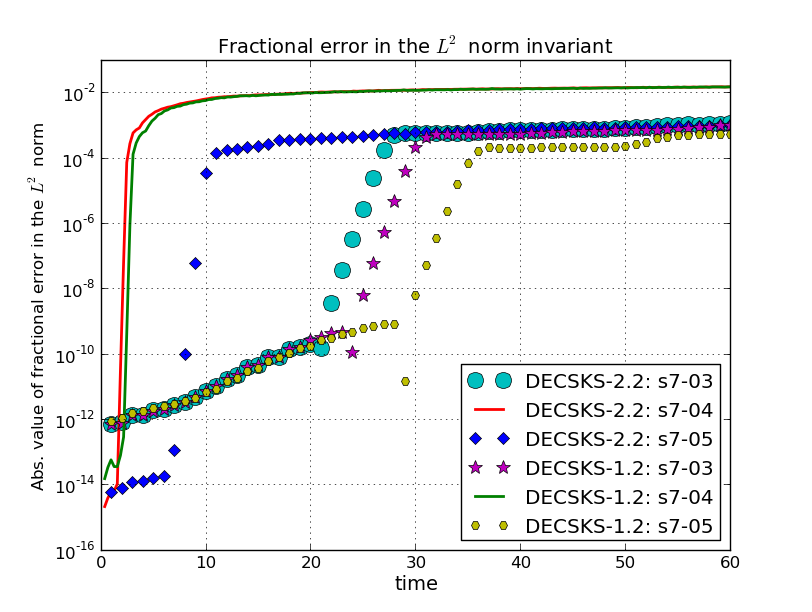

In [9]:
from IPython.display import Image
Image(filename='./fig/I2_FD7.png')

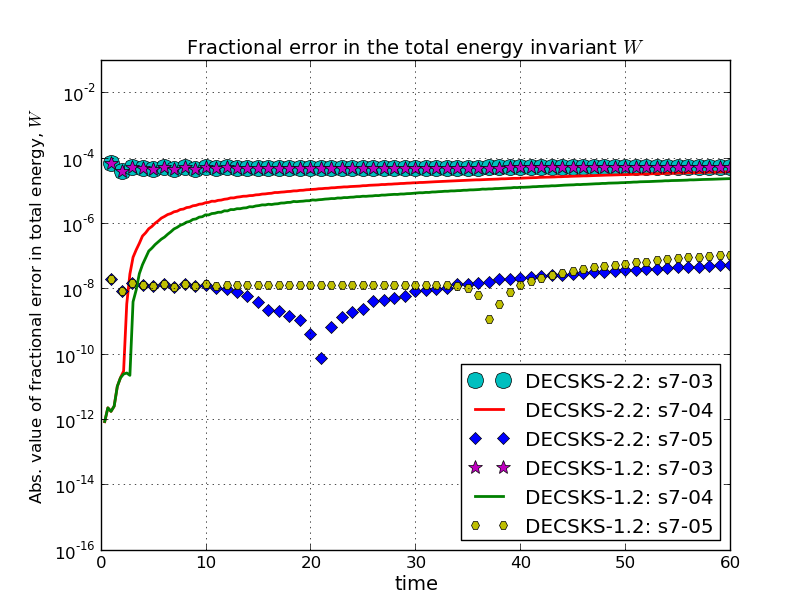

In [10]:
from IPython.display import Image
Image(filename='./fig/W_FD7.png')

ion contribution neglected above

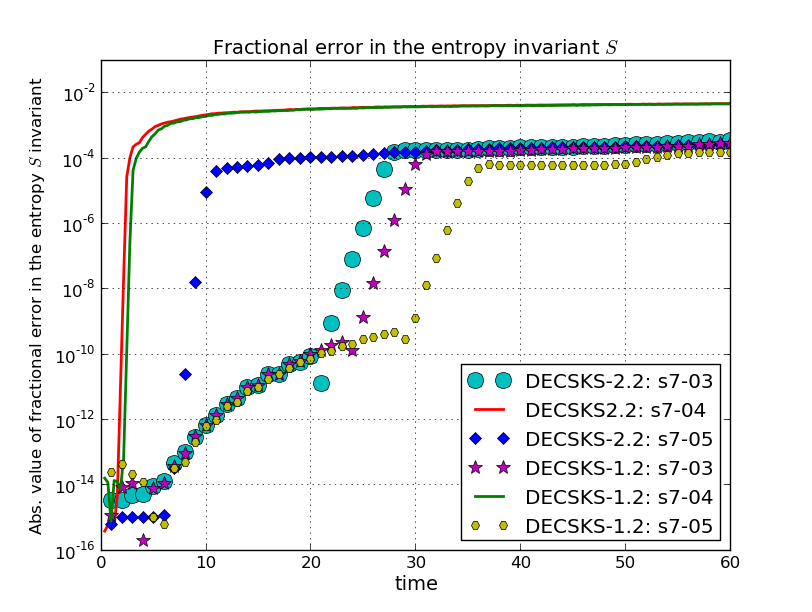

In [11]:
from IPython.display import Image
Image(filename='./fig/IS_FD7.png')

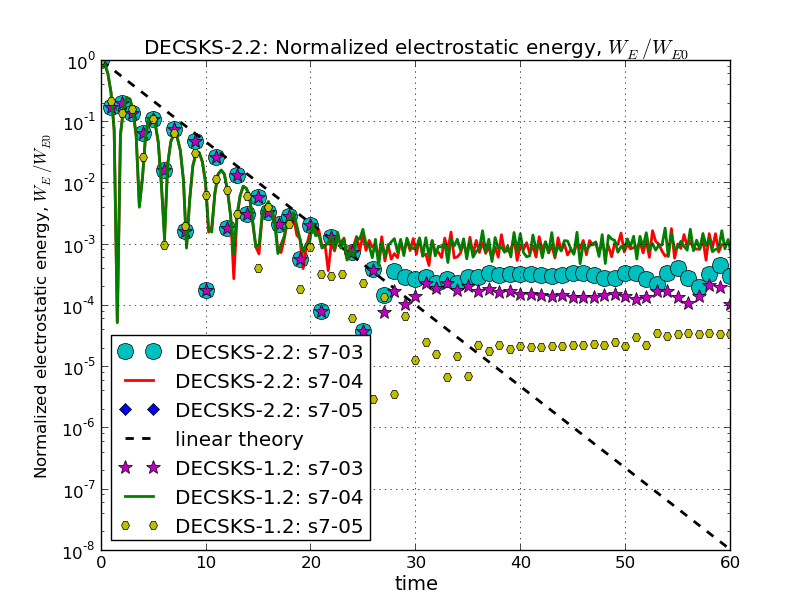

In [12]:
from IPython.display import Image
Image(filename='./fig/WE_FD7.png')

Deviations from adhering to the linear theory here happen here with the finite difference solver, but do not occur in the Fourier solver. The reason is clear, it comes down to the fidelity of the finite differences to be able to estimate the high order corrections properly. When the gradients in velocity space grow beyond a threshold filamentation point, the finite difference method cannot correct the solver, we fall back on the numerical limiter which reduces the solver to first order LTE, and hence we miss out on the required information contained in these derivatives when the distribution function presents too much filamentation in phase space. This issue in Vlasov-Poisson problems is classic.

We can see this from a splitting standpoint. Recall we solve in sequence:

$$\partial_t f + v_x\partial_x f = 0$$
$$\partial_t f + a_x\partial_{v_x}f = 0$$

The former has the exact solution $f(t, x, v_x) = f_0(x - v_xt, v_x)$, where $f_0 \equiv f(0,x,v_x)$. Differentiating we find:

$$\frac{\partial f}{\partial v_x} = \frac{\partial f_0}{\partial v_x} - t\frac{\partial f_0}{\partial x}$$

Where it is clear the second term is unrestrainted which causes the gradient in $v_x$ to get larger and larger with time. Even Fourier methods are not immune to this problem, though due to spectral convergence it will take longer for this filmamentation problem to corrupt the solution, the steep gradients means the compact support in $v_x$ increases with time, hence we can interpret this as producing larger contributions to the high frequency modes of the solution. The only way to protect the solution is to use a filtering technique (e.g. WENO, ENO, Gaussian filter per Klimas). The issue with doing so is of course that filtering adjusts the solution and hence can damage the solution in its handling. The requirement we seek of course is that we need a filter whose corruption of the solution is significantly better than its unfiltered counterpart. We will seek wrapping our derivative calculations with a WENO scheme in the near future to handle not only this but to generally handle edges and sharp regions in phase space.

## TODO s18-17: Strong (nonlinear) Landau damping

input decks:

<a href = "insert url">params_s18-17.dat</a>
<a href = "insert url">params_boundaryconditions_s18-17.dat</a>
<a href = "insert url">params_output_s18-17.dat</a>

The initial density is: 

$$f_0(x,v_x) = \frac{1}{\sqrt{2\pi}}(1 + \varepsilon\cos (kx))\exp(-v^2 / 2)$$

where we have a long wavelength modulation with $k = 0.5$ as before, but for strong nonlinearity we choose we choose $\varepsilon = 0.5$ so that the linearization about $f_0 = \frac{1}{\sqrt{2\pi}} \exp (-v^2/2)$ is not accurate.

simulation specs:

    Nx = 256
    Nvx = 512
    Nt = 120
    T = 60 --> dt = 0.5
    
    LTE[phase space solver] = 22
    time splitting error order = 5 per step (O6-4)
    
    corrections on x: fourier
    corrections on vx: fourier

## electrons at selected times

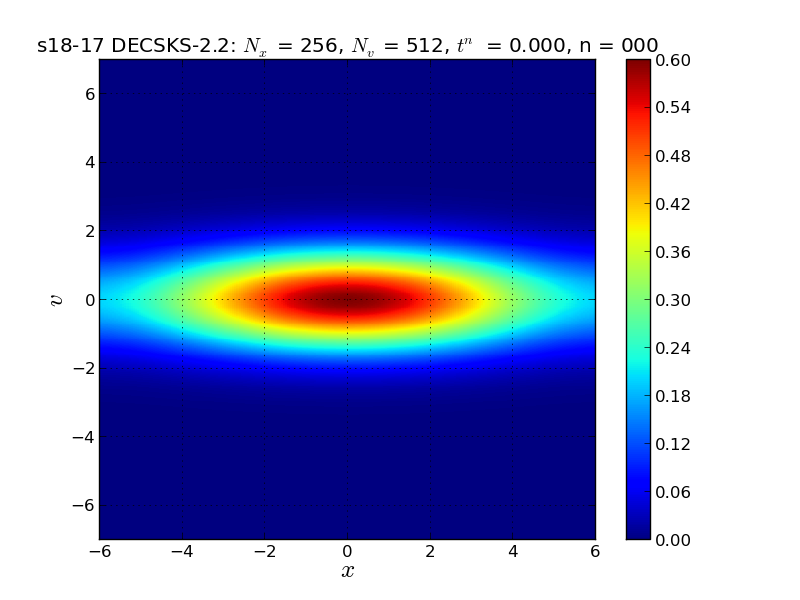

In [1]:
from IPython.display import Image
Image(filename='./fig/s18-17_plot_-_1D1V_electron_O6-4_Nx256Nv512Nt120_it00000.png')

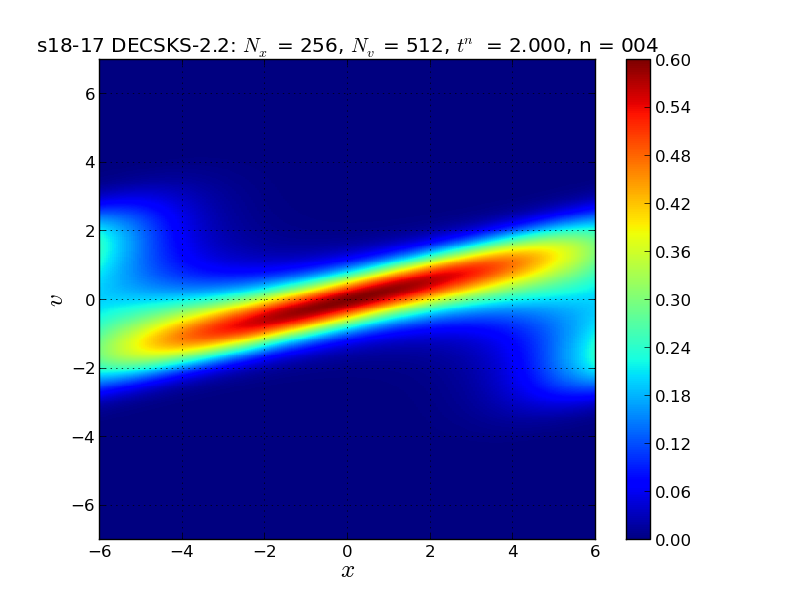

In [2]:
from IPython.display import Image
Image(filename='./fig/s18-17_plot_-_1D1V_electron_O6-4_Nx256Nv512Nt120_it00004.png')

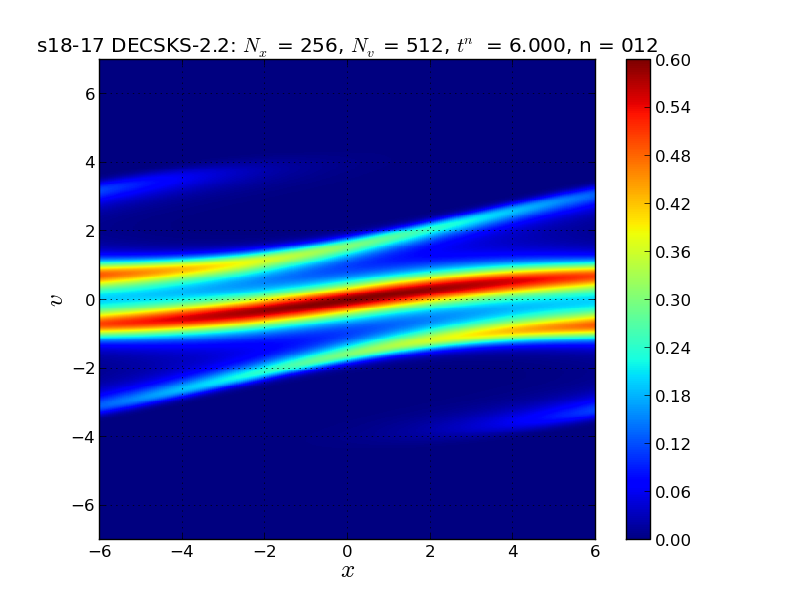

In [3]:
from IPython.display import Image
Image(filename='./fig/s18-17_plot_-_1D1V_electron_O6-4_Nx256Nv512Nt120_it00012.png')

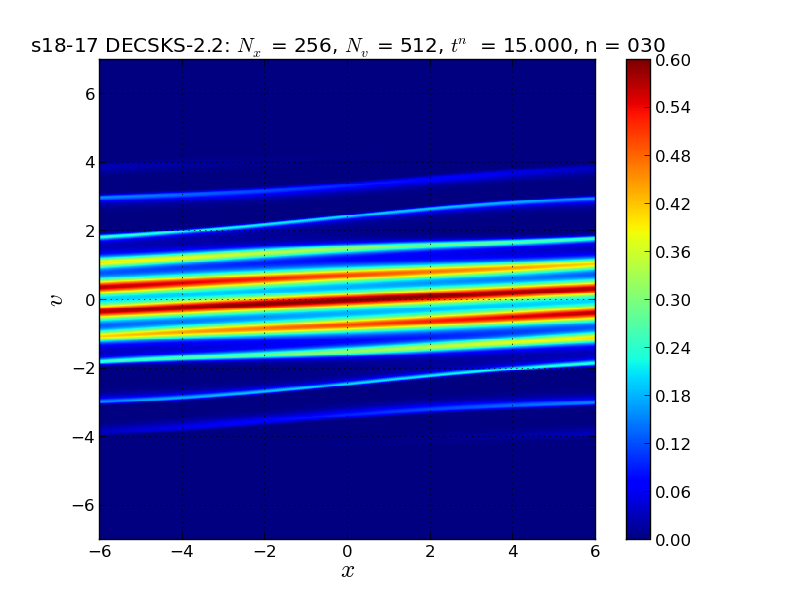

In [4]:
from IPython.display import Image
Image(filename='./fig/s18-17_plot_-_1D1V_electron_O6-4_Nx256Nv512Nt120_it00030.png')

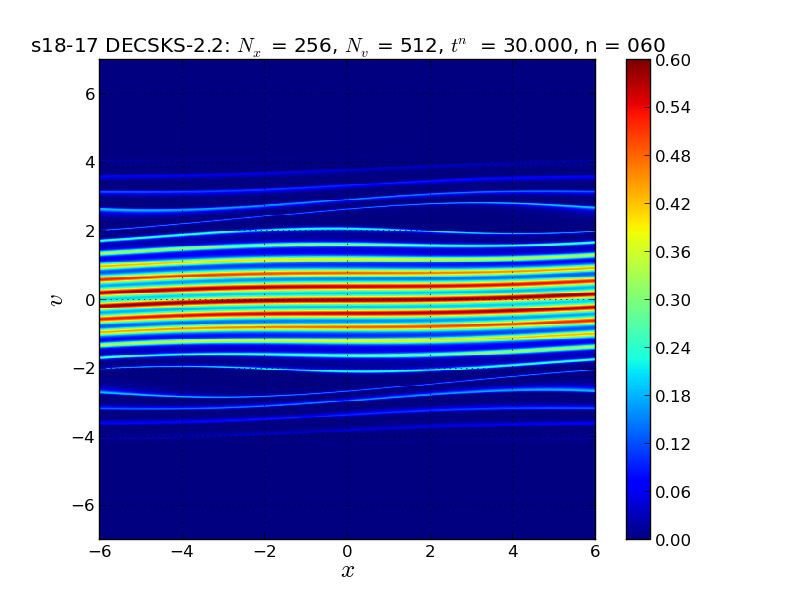

In [5]:
from IPython.display import Image
Image(filename='./fig/s18-17_plot_-_1D1V_electron_O6-4_Nx256Nv512Nt120_it00060.png')

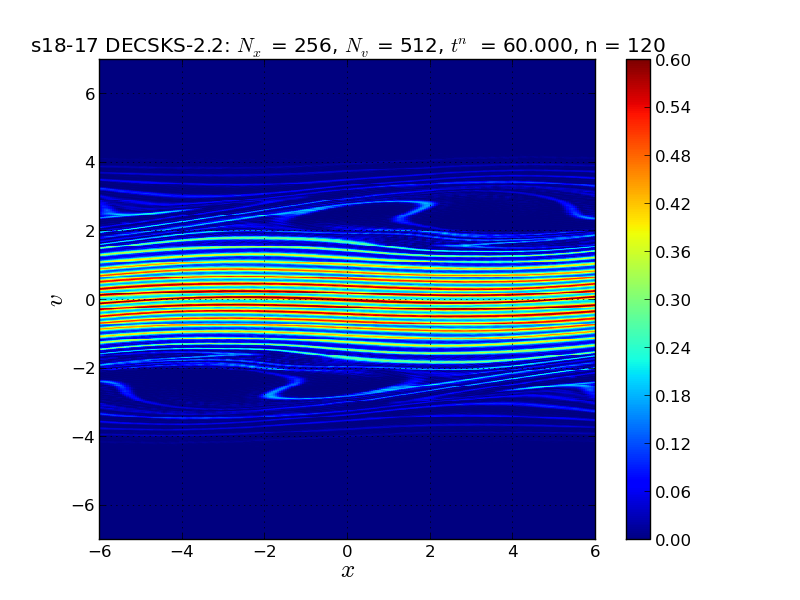

In [6]:
from IPython.display import Image
Image(filename='./fig/s18-17_plot_-_1D1V_electron_O6-4_Nx256Nv512Nt120_it00120.png')

## Tracking of conserved quantities

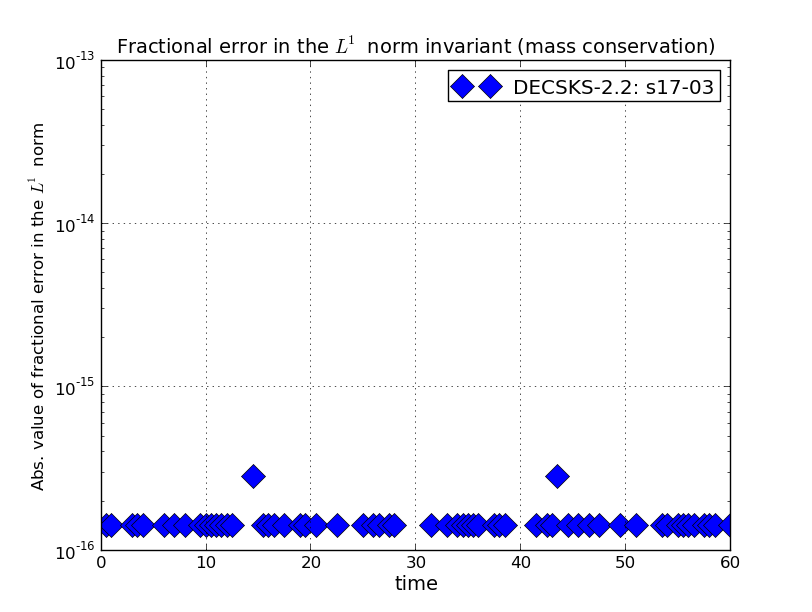

In [8]:
from IPython.display import Image
Image(filename='./fig/I1_s18-17.png')

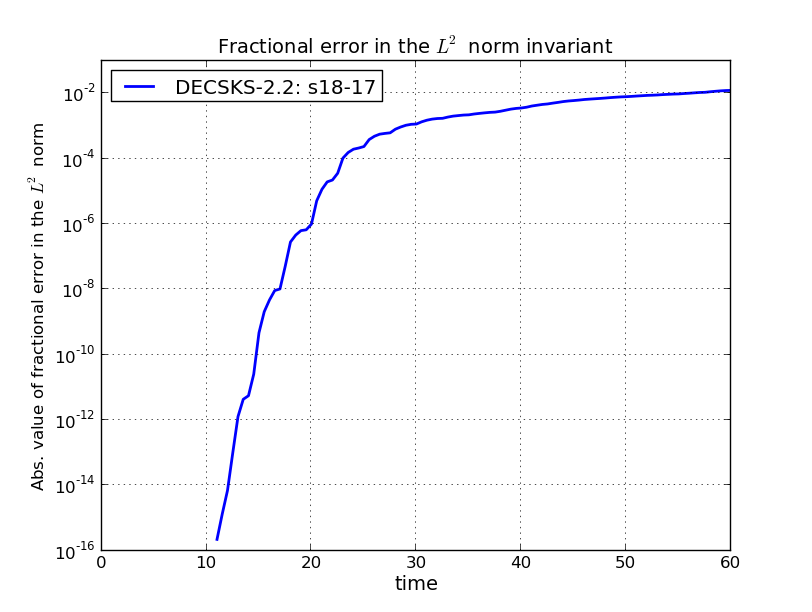

In [9]:
from IPython.display import Image
Image(filename='./fig/I2_s18-17.png')

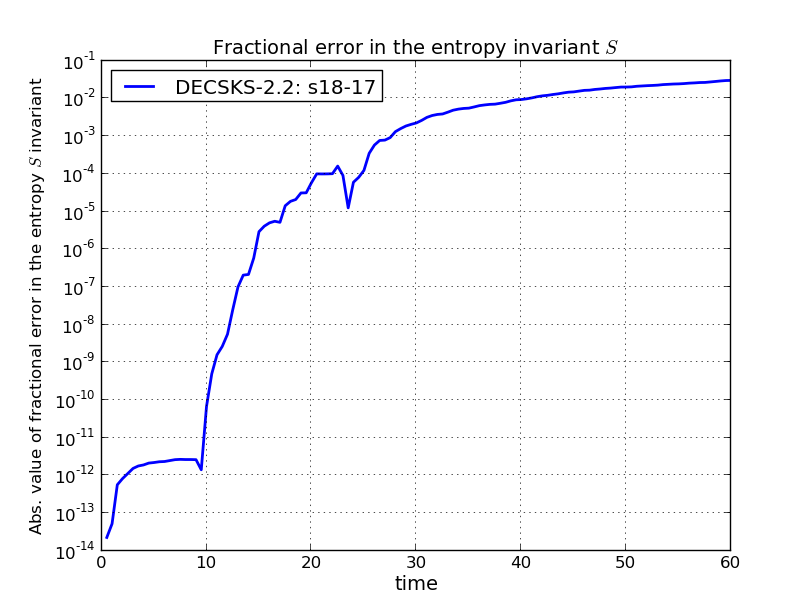

In [10]:
from IPython.display import Image
Image(filename='./fig/IS_s18-17.png')

To compare the effect of including ions in the total energy vs. not, we provide both below

#### without ion contriution in $I_W$

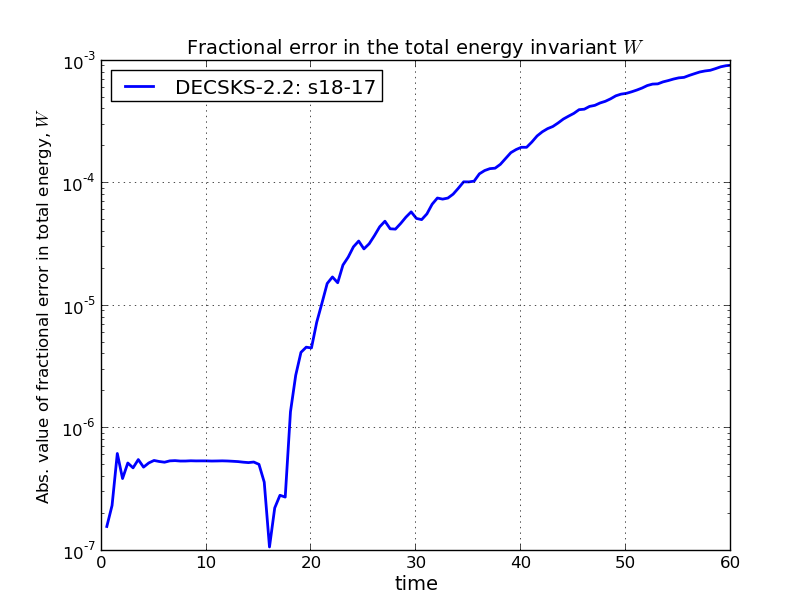

In [11]:
from IPython.display import Image
Image(filename='./fig/W_s18-17.png')

With ions below, the total energy is maintained at several orders of magnitude better.

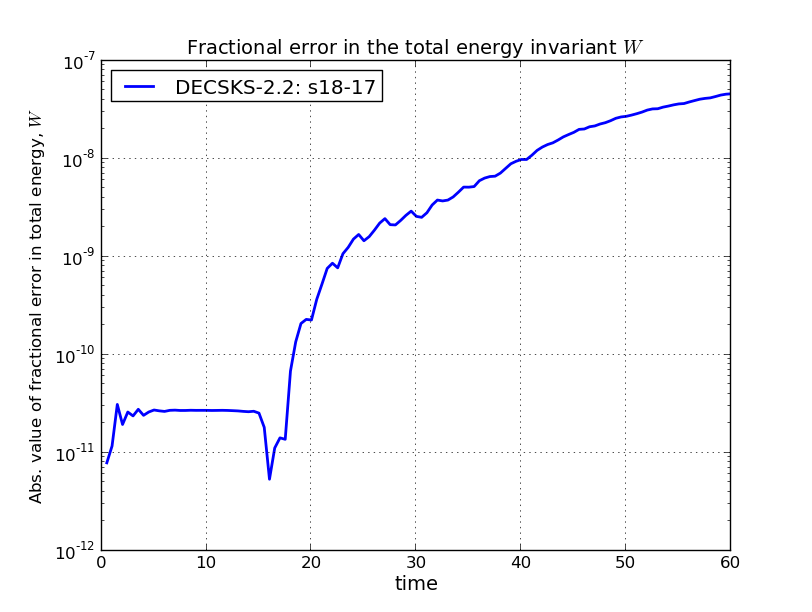

In [1]:
from IPython.display import Image
Image(filename='./fig/W_s18-17_with_ions.png')

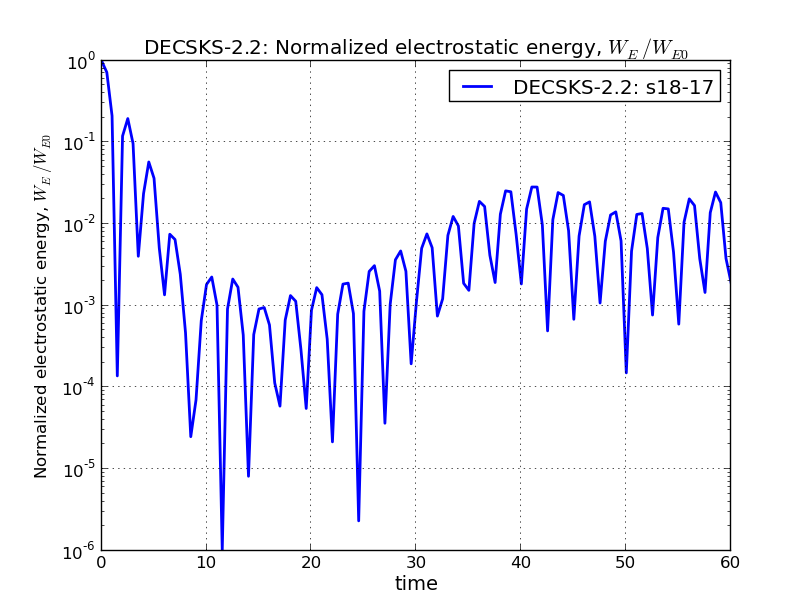

In [12]:
from IPython.display import Image
Image(filename='./fig/WE_s18-17.png')

## s17-01: Bump on tail instability; $x$-periodic, $v_x$-periodic

We choose an electron density that has a bump on the high energy tail side of the velocity and which is modulated under a long wavelength cosine function:

$$f_e(0,x,v)  = \frac{1}{\sqrt{2\pi}}(1 + 0.04\cos (0.3 x))(0.9 e^{-v^2 / 2} + 0.2 e^{-4 (v - 4.5)^2})$$

We consider the domain $x\in [a_x, b_x] = [-10\pi / 3 , 10\pi / 3 ]$, $v\in [a_v, b_v] = [-8.0, 8.0]$. We choose an initially constant ion background (recall DECSKS-2.2 evolves both electrons and ions so these are immoble, but of course (inertially) respond $\simeq 1836$ slower than the electrons):

$$f_i(0,x,v) = \frac{\langle n_e\rangle}{b_v - a_v}, \qquad \langle n_e\rangle = 0.970710678119$$

where the average electron density was computed both analytically and proofed numerically in notebook DECSKS-17.

for s17-01 we use the following specs:

    Nx = 256
    Nvx = 512
    T = 22
    Nt = 44 --> dt = 0.5
    
    corrections on x: fourier
    corrections on vx: fourier    
    
    LTE[phase space solver] = 22
    O6-4 time split  = order 5 error per step

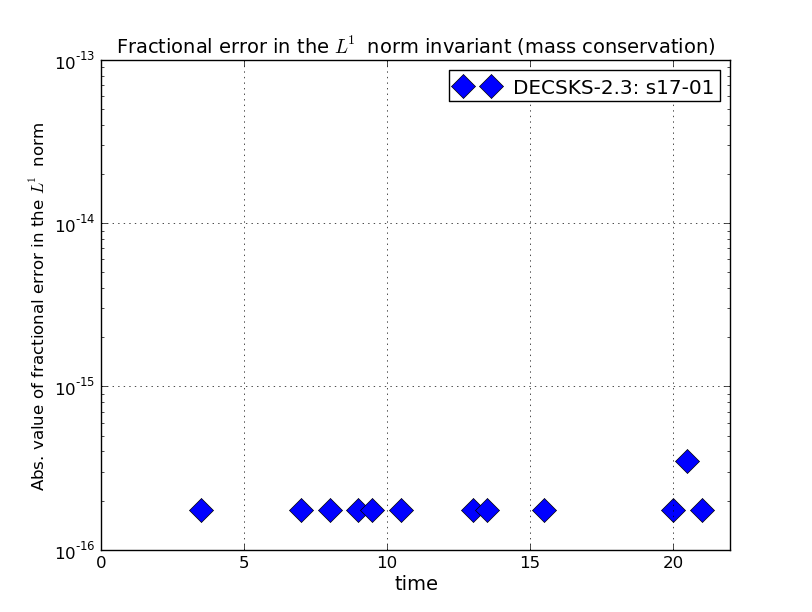

In [1]:
from IPython.display import Image
Image(filename='./fig/I1_s17-01.png')

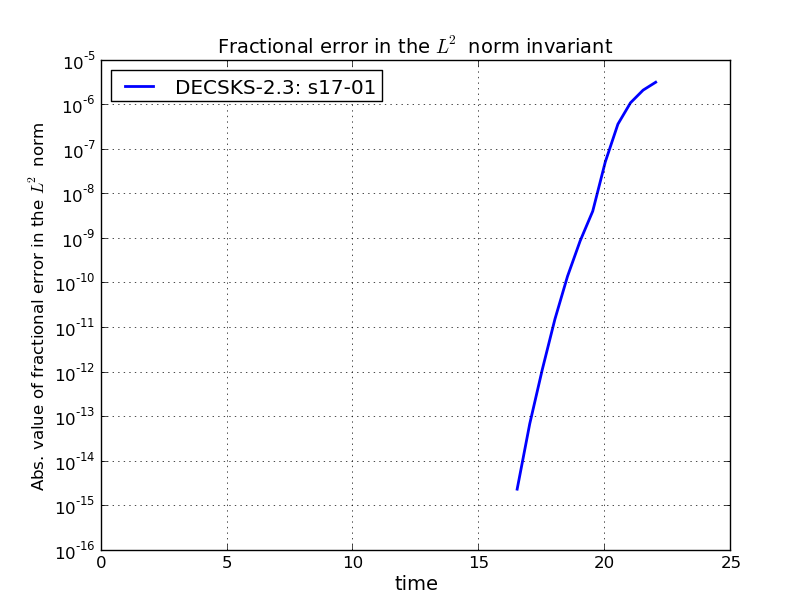

In [2]:
from IPython.display import Image
Image(filename='./fig/I2_s17-01.png')

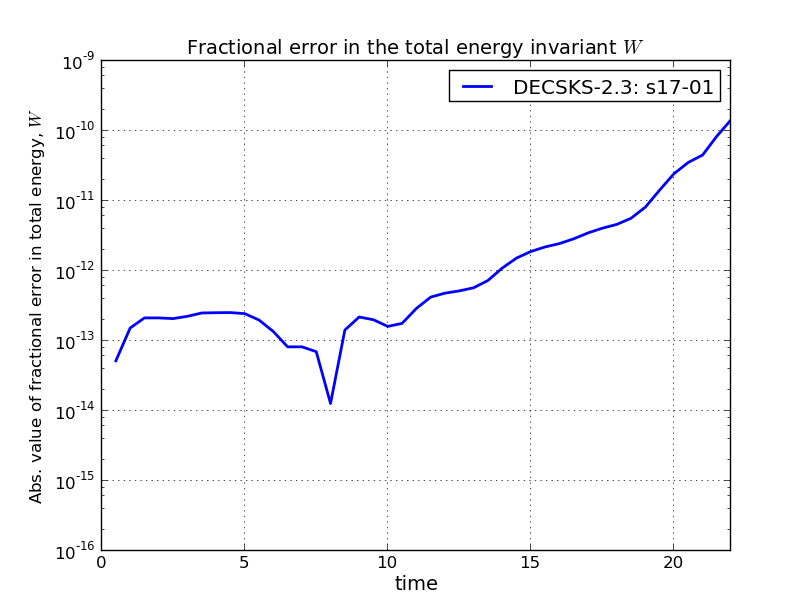

In [3]:
from IPython.display import Image
Image(filename='./fig/W_s17-01.png')

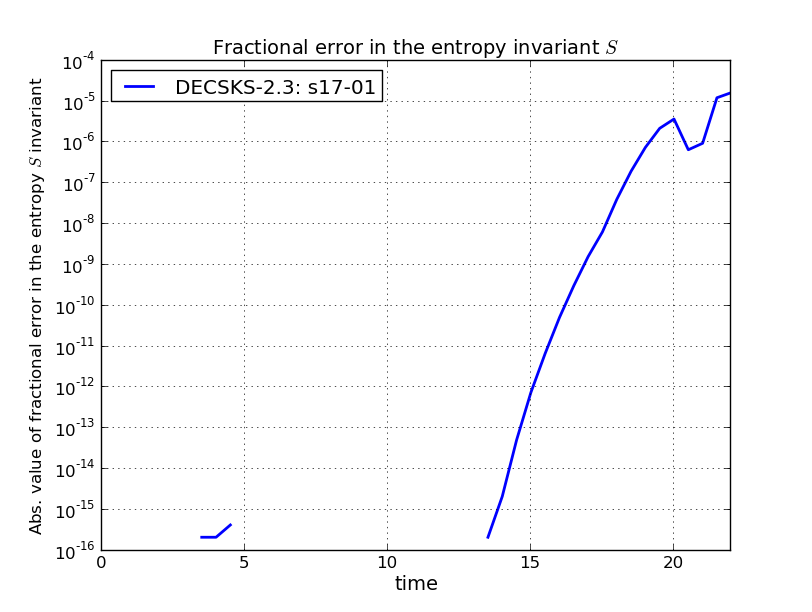

In [4]:
from IPython.display import Image
Image(filename='./fig/IS_s17-01.png')

Above, wherever there is a zero the data is not included in the semilog plot for obvious reasons. For example, the data for the fractional deviation in the entropy is recorded as:

We can compare this with Guclu, where the source is listed on the bottom of the slide. Note that Guclu uses a constant ion background, whereas we evolve the ion density along aside the electron. We arrive at better conservation by some margin in DECSKS-2.3.

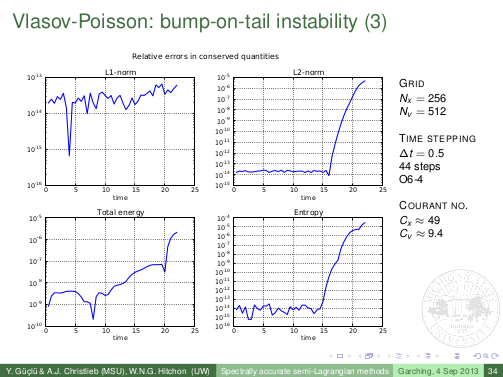

In [4]:
from IPython.display import Image
Image(filename='./fig/Guclu_s17-01.png')

Which upon comparing with DECSKS-2.2 outputs, is hard to distinguish between the two. The main curvature points are upheld, whereas DECSKS-2.2 can sometimes outperform Guclu's outputs slightly (cf. L1 norm, total energy, L2 norm, ...), but does not do worse. Note features such as the dip in total energy around $t = 8$ in both Guclu and DECSKS-2.2 outputs. Since we have sound agreement between these two sets of simulations, we have run out of need to compare it with the legacy DECSKS-1.2 output.

# TODO s17-03 and s17-04 comparison: long time integration -- Fourier vs. FD

we now consider the same simulation over a long time

## s17-03: Fourier solver specs

input decks:

<a href = "insert url">params_s17-03.dat</a>
<a href = "insert url">params_boundaryconditions_s17-03.dat</a>
<a href = "insert url">params_output_s17-03.dat</a>

    Nx = 240
    Nvx = 512
    T = 1000
    Nt = 2000 --> dt = 0.5
    
    corrections on x: fourier
    corrections on vx: fourier    
    
    LTE[phase space solver] = 22
    O6-4 time split  = order 5 error per step

## s17-04: FD solver specs

input decks:

<a href = "insert url">params_s17-04.dat</a>
<a href = "insert url">params_boundaryconditions_s17-04.dat</a>
<a href = "insert url">params_output_s17-04.dat</a>

    Nx = 240
    Nvx = 512
    T = 1000
    Nt = 2000 --> dt = 0.5
    
    corrections on x: fourier
    corrections on vx: fourier    
    
    LTE[phase space solver] = 8
    O6-4 time split  = order 5 error per step

Recall that we do not factor in periodicity into our finite difference grid sampling, we sample only on-grid points as if the circumstance was not periodic. It is of course possible and easy to code a special version of the finite differencing matrix that samples the "other side" of the grid when we are estimating derivatives near the edges, which would yield superior results given the enforced periodicity; however, there is lack of motivation here as if we were to use a periodic solver we might as well use the Fourier solver. Here, we want to assess the fidelity of non-periodic solvers, which in general is used for all cases. Note that Guclu compares a Fourier scheme with the FD scheme that *does* sample periodically, hence it is not a one-to-one correspondence between our finite difference results and Guclu's.

We juxtapose some snapshots here of the densities:

## electrons at selected times

At time zero, both densities are initialized identically.

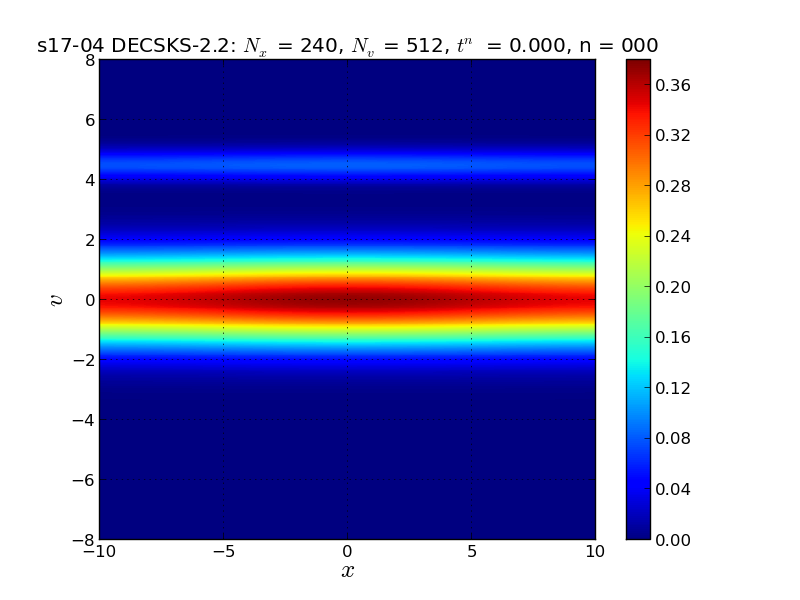

In [19]:
from IPython.display import Image
Image(filename='./fig/s17-04plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it00000.png')

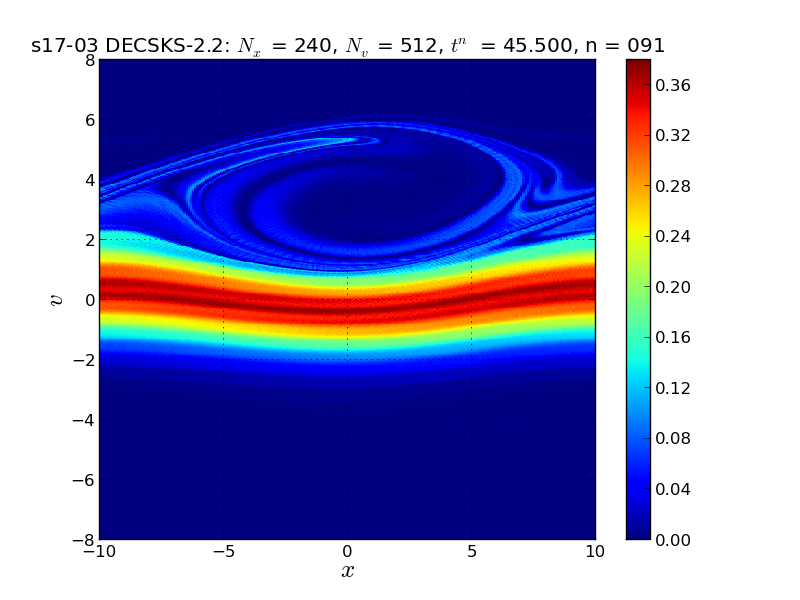

In [6]:
from IPython.display import Image
Image(filename='./fig/s17-03_plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it00091.png')

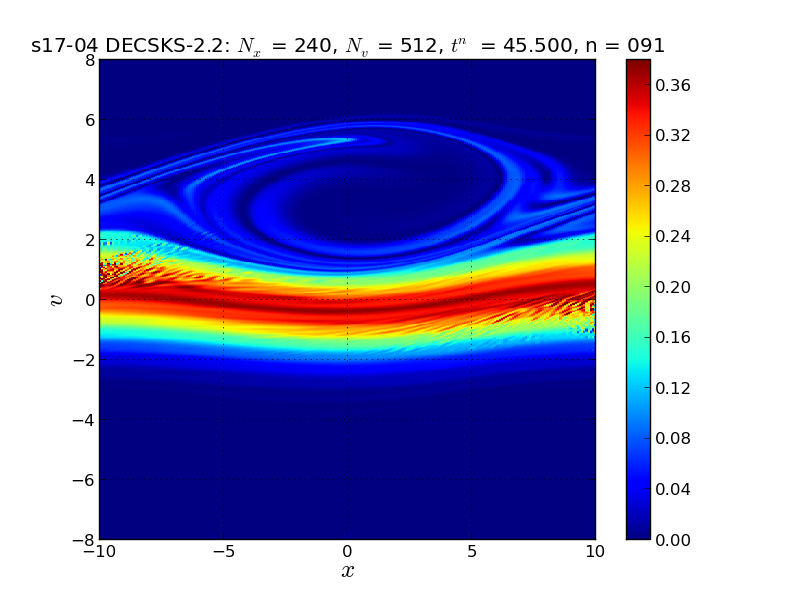

In [20]:
from IPython.display import Image
Image(filename='./fig/s17-04plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it00091.png')

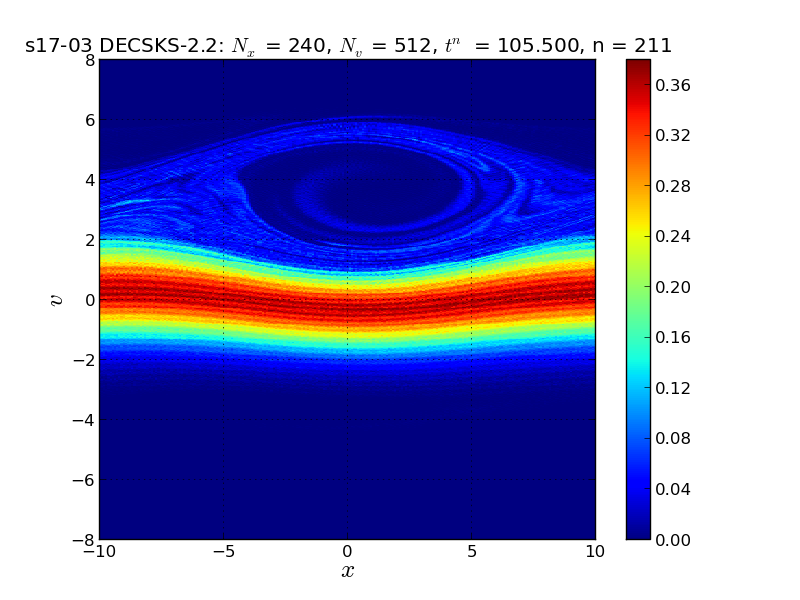

In [7]:
from IPython.display import Image
Image(filename='./fig/s17-03_plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it00211.png')

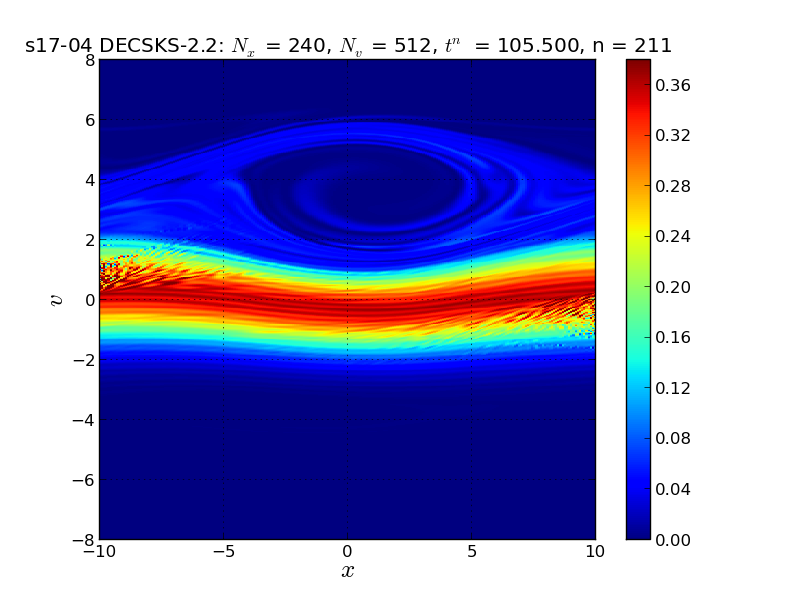

In [21]:
from IPython.display import Image
Image(filename='./fig/s17-04plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it00211.png')

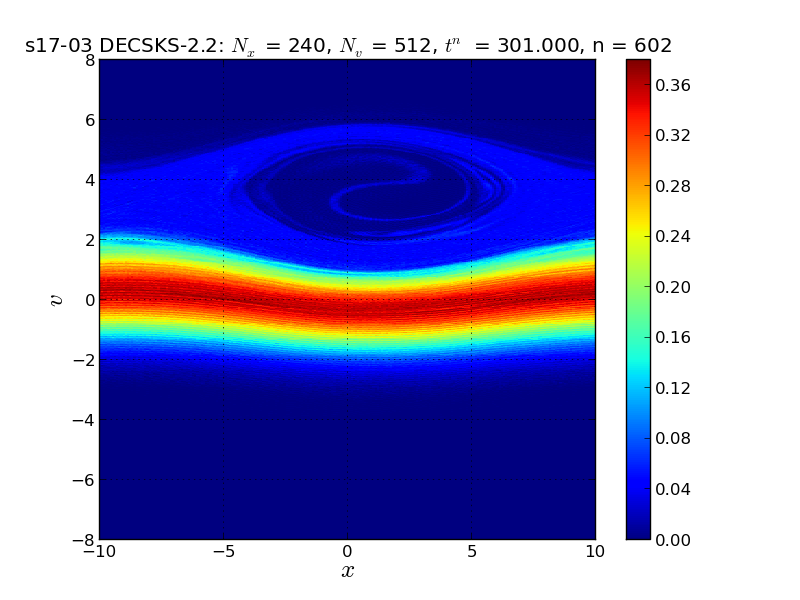

In [8]:
from IPython.display import Image
Image(filename='./fig/s17-03_plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it00602.png')

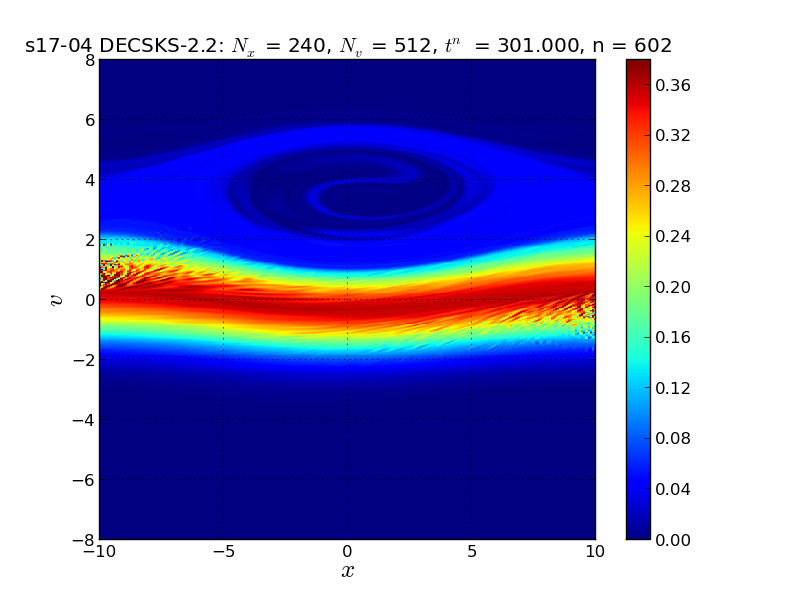

In [22]:
from IPython.display import Image
Image(filename='./fig/s17-04plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it00602.png')

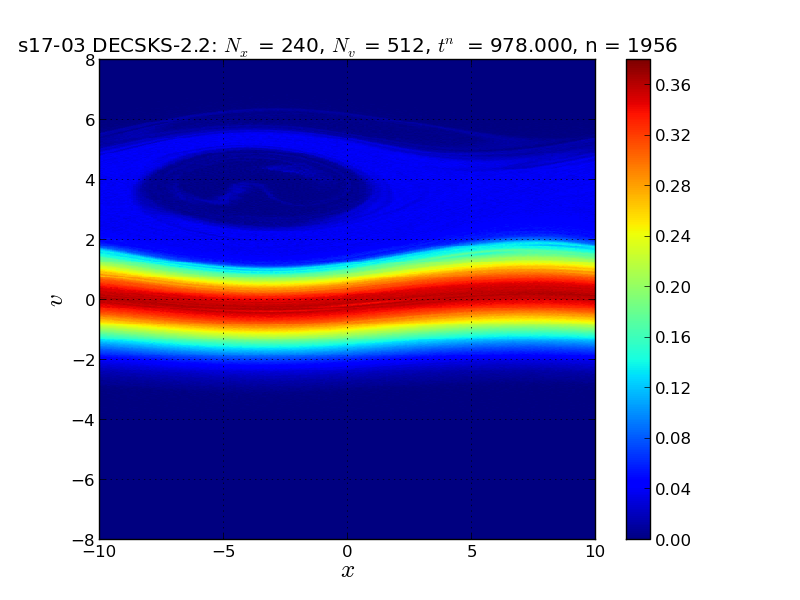

In [9]:
from IPython.display import Image
Image(filename='./fig/s17-03_plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it01956.png')

By this point, some difference in the macrostructure transport is even present, though it took almost 1900 steps for this difference to catch up with it to the point where it's noticeable on a plot. The Fourier plot above lags behind the FD plot below by about $\Delta t = 1$ electron period.

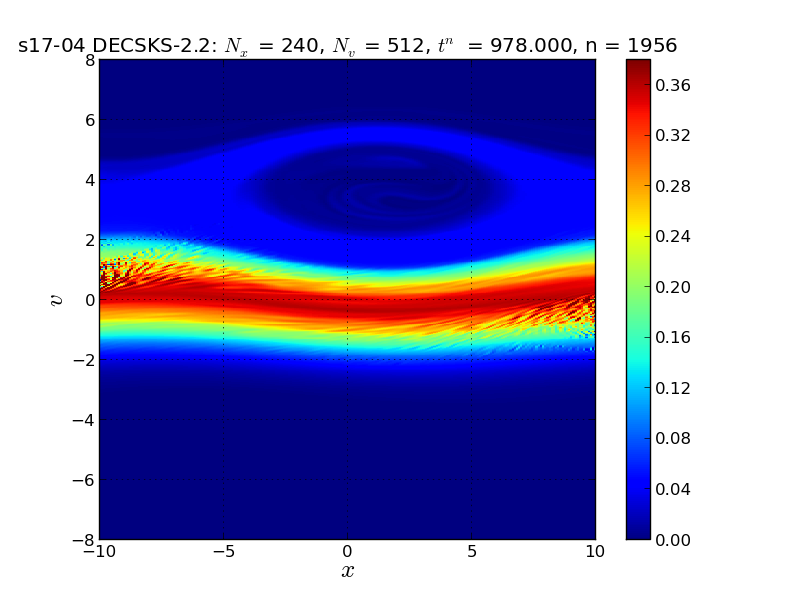

In [23]:
from IPython.display import Image
Image(filename='./fig/s17-04plot_-_1D1V_electron_O6-4_Nx240Nv512Nt2000_it01956.png')

This difference between the fourier and fd solutions is an effect of the numerical artifices from the edge differencing that are obvious from the above as well as it translating to differences in the ion background density which was also evolved. We show this below. In all, as anticipated, both solveres agree over quite long times. The edges have numerical artifices due to less-than-centered differencing in the finite difference stencils. These edge-originating errors infiltrate the solution domain, but does not perturb the overall deleteriously for most of the simulation (i.e. these all match up well with the Fourier solution until quite long into the simulation) 

Reassuringly, the nonlinear saturation that would be expected has reached its steady state. The ions which are also evolved reach a steady state as well. Since their features are less interesting, we show only two snapshots. The ions in the Fourier case do not show visible change on a plot; however, the numerical artifices in the finite differencing method does produces "streams" of higher density ions flowing left and right. Note that the ostensible zero difference between time zero and a time snapshot taking near the end for the Fourier case is not to mean the background density is actually constant, but rather means the background incurs changes over much smaller amounts throughout phase space than is visible on our wide range of densities colored.

## ions at selected times

At time zero we have the identical densities.

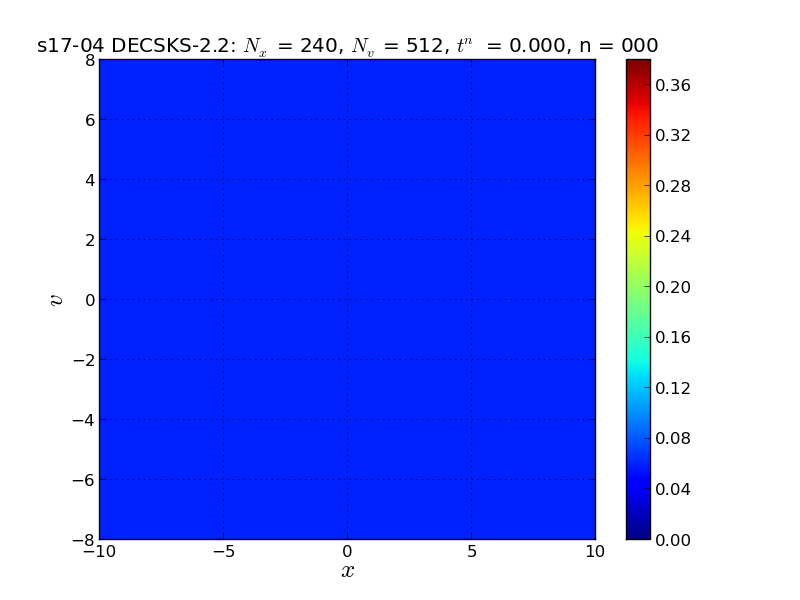

In [24]:
from IPython.display import Image
Image(filename='./fig/s17-04plot_-_1D1V_ion_O6-4_Nx240Nv512Nt2000_it00000.png')

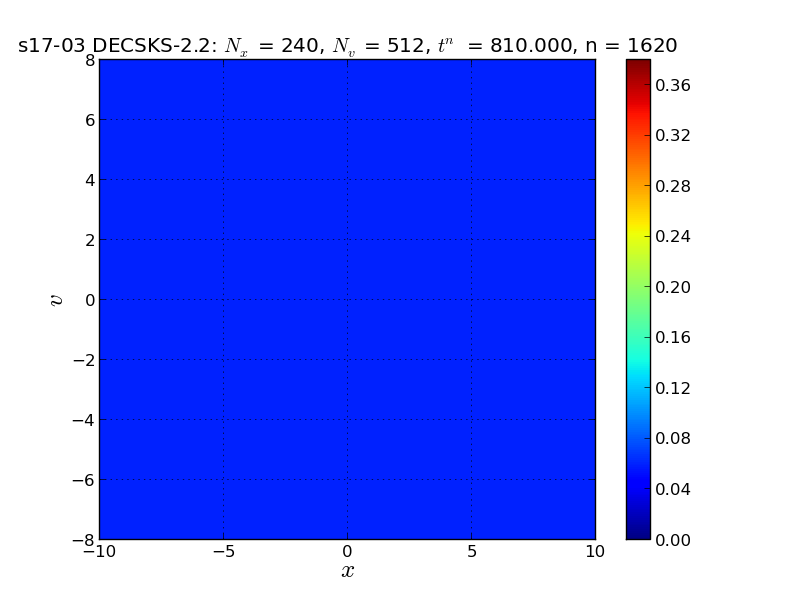

In [10]:
from IPython.display import Image
Image(filename='./fig/s17-03_plot_-_1D1V_ion_O6-4_Nx240Nv512Nt2000_it01620.png')

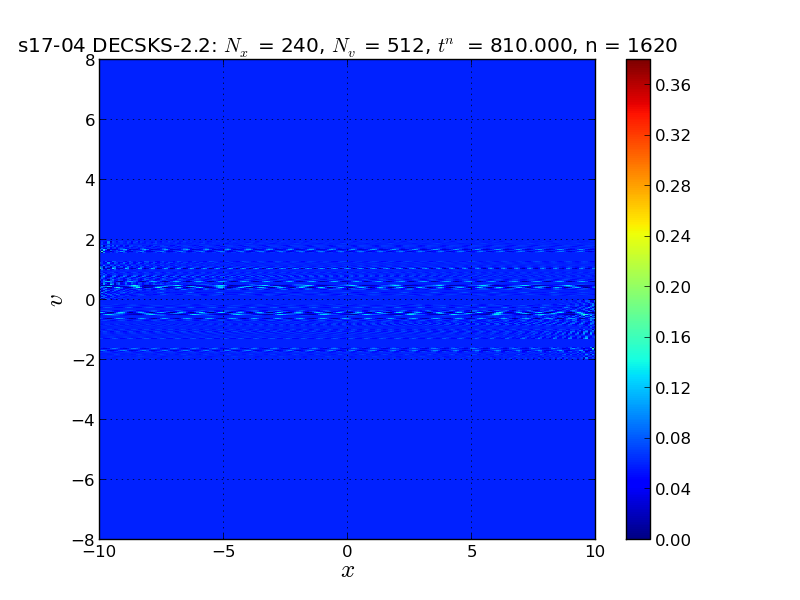

In [25]:
from IPython.display import Image
Image(filename='./fig/s17-04plot_-_1D1V_ion_O6-4_Nx240Nv512Nt2000_it01620.png')

The above is the steady state distribution

## tracking of conserved quantities

The invariants are preserved to the levels shown below:

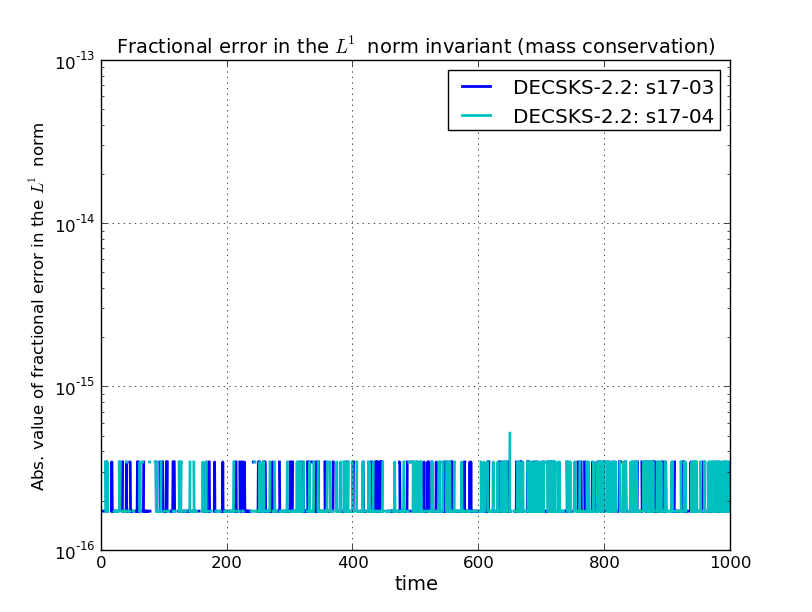

In [1]:
from IPython.display import Image
Image(filename='./fig/I1_s17.png')

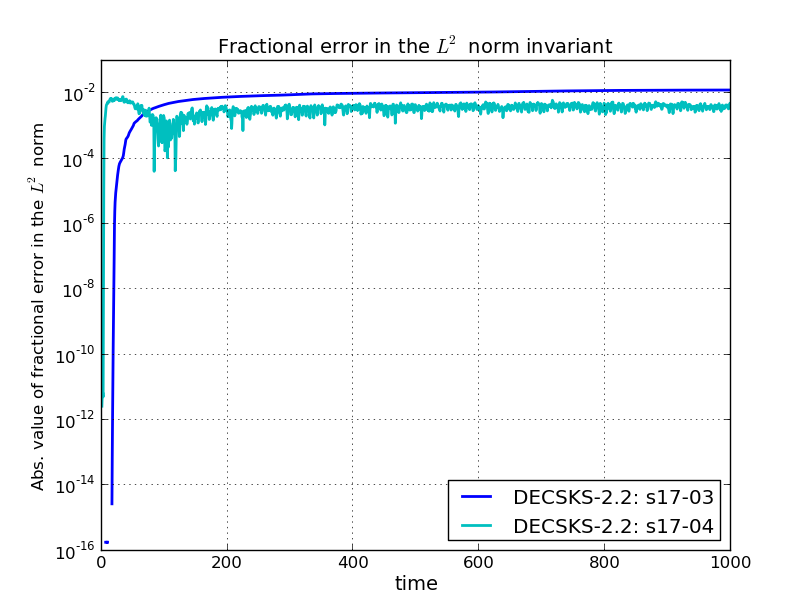

In [2]:
from IPython.display import Image
Image(filename='./fig/I2_s17.png')

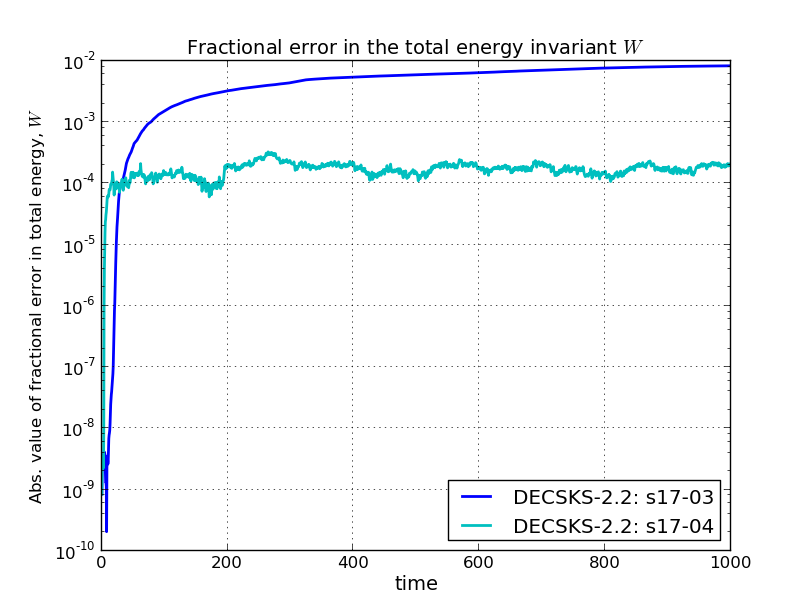

In [3]:
from IPython.display import Image
Image(filename='./fig/W_s17.png')

ion energies neglected above

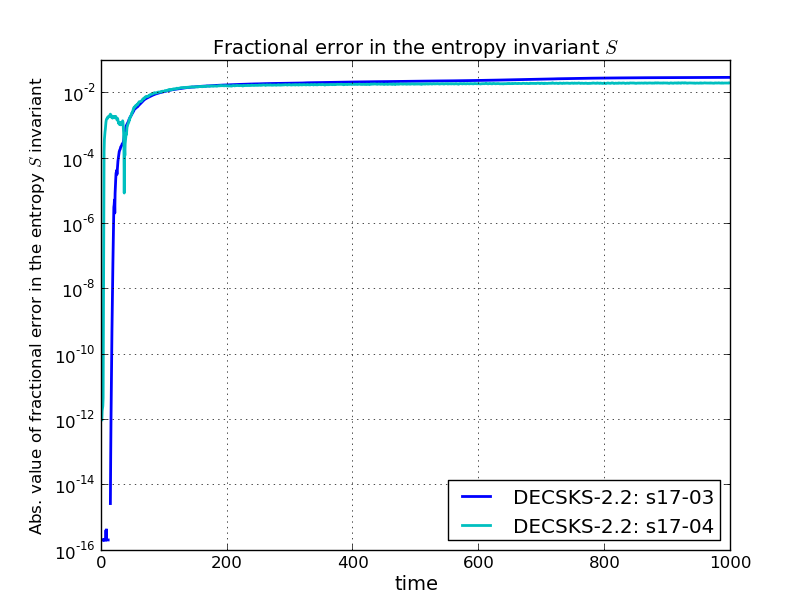

In [4]:
from IPython.display import Image
Image(filename='./fig/IS_s17.png')

The electrostatic energy increases as the high energy bump in the distribution transfers energy to the electrostatic field, whereafter a nonlinear saturation occurs where the interchanges of energy between wave and particles goes back and forth. This initial increase in stored electrostatic field energy and subsequent oscillation are both physical.

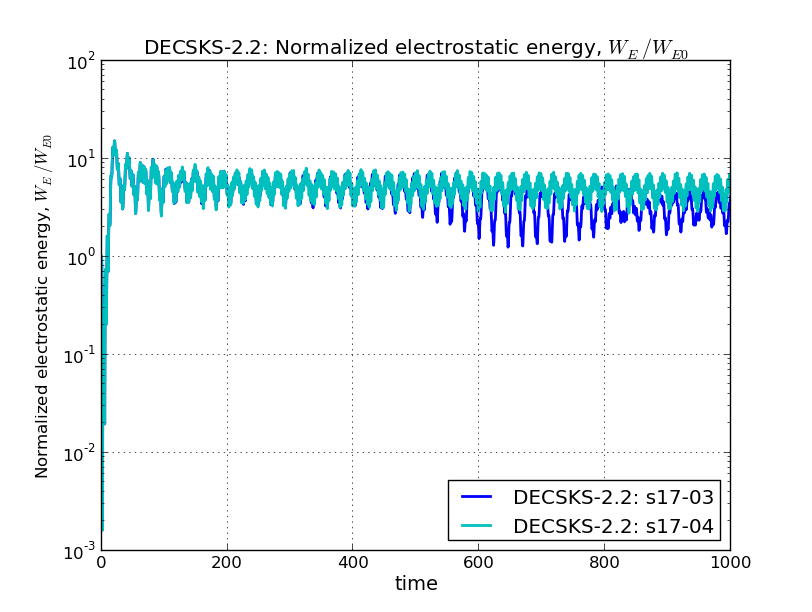

In [5]:
from IPython.display import Image
Image(filename='./fig/WE_s17.png')

Similar trends and values check out with that shown by Guclu for the identical simulation.

## s18-20: Two stream instability

We take the case from Banka [J. Banks and J. Hittinger, A new class of nonlinear finite-volume methods for
vlasov simulation, Plasma Science, IEEE Transactions on, 38 (2010), pp. 2198–2207], which was also modeled by Qiu et. al [arXiv:1602.08663 [math.NA]]. The density is given by:

$$f_0(x,v_x) = f_0(v_x)f_0(x)$$

where 

$$f_0(v_x) = \frac{1}{\sqrt{8\pi}v_{the}}\left[\exp\left(-\frac{(v - v_0)^2}{2v_{the}^2}\right) + \exp\left(-\frac{(v + v_0)^2}{2v_{the}^2}\right)\right], \qquad f_0(x) = 1 + \varepsilon\cos (kx), \qquad \varepsilon = 0.0005, k = 0.2$$

i.e. the nonlinearity in $x$ is small enough so that linear theory provides reasonable expectations for our simulations. The two stream instability is a fluid instability whose main consequences can be obtained by considering a stream of electrons (ions) at some velocity $v_0$ relative to an ion (electron) species in the frame of the observer. We consider moving electrons here and thus consider ions to be 'cold' (or we remark we are in a frame that moves with the ion fluid velocity). A stream of electrons at velocity $v_0\hat{x}$ will be unstable to electrostatic waves that propagate in the $\hat{x}$ direction, hence we encourage the instability by modelling a counter flow of electrons in $-\hat{x}$.

Kinetic modeling would collapse to the fluid theory in the delta function limit, which on a kinetic solver is computationally burdensome given sharpness in the density profile in phase space, the estimates for high order corrections as derivatives for these steep gradients, as well as initializing a condition that already has significant filamentation which can transfer energy artifially to lower scales by an aliasing effect that is unavoidable on a grid of a given (non-adapative) resolution. 

Thus, to approacha delta function distribution, we consider several values of $v_{the}$ which cause the profile to become thinner in phase space and compare our results with theory. Namely, linear theory for $k = 0.2$ predicts that the maximum growth rate $\gamma = 1/ \sqrt{8}$. Given our nonlinear solver, we expect some nonlinear saturation to occur so that this growth will not persist indefinitely, but will reach some steady state.

The three simulations are the same with the exception of $v_{the}$ = v_the, we summarize the key specs below:

    s20 specifications:

        Nx = 256, ax = -5 pi, bx= +5 pi
        Nvx = 256, avx = -8.0, bvx = 8.0
        T = 50
        Nt = 100 --> dt = 0.5
        
We choose the ion density so that we have charge neutrality at time zero as usual. 

Input decks:


s18-20, v_the = 0.5

<a href = "insert url">params_s18-20.dat</a>
<a href = "insert url">params_boundaryconditions_s18-20.dat</a>
<a href = "insert url">params_output_s18-20.dat</a>


s18-20b, v_the = 0.0625

<a href = "insert url">params_s18-20b.dat</a>
<a href = "insert url">params_boundaryconditions_s18-20b.dat</a>
<a href = "insert url">params_output_s18-20b.dat</a>

s18-20c, v_the = 0.03125

<a href = "insert url">params_s18-20c.dat</a>
<a href = "insert url">params_boundaryconditions_s18-20c.dat</a>
<a href = "insert url">params_output_s18-20c.dat</a>

## electrons at selected times for $v_{the} = 0.5$ (s18-20)

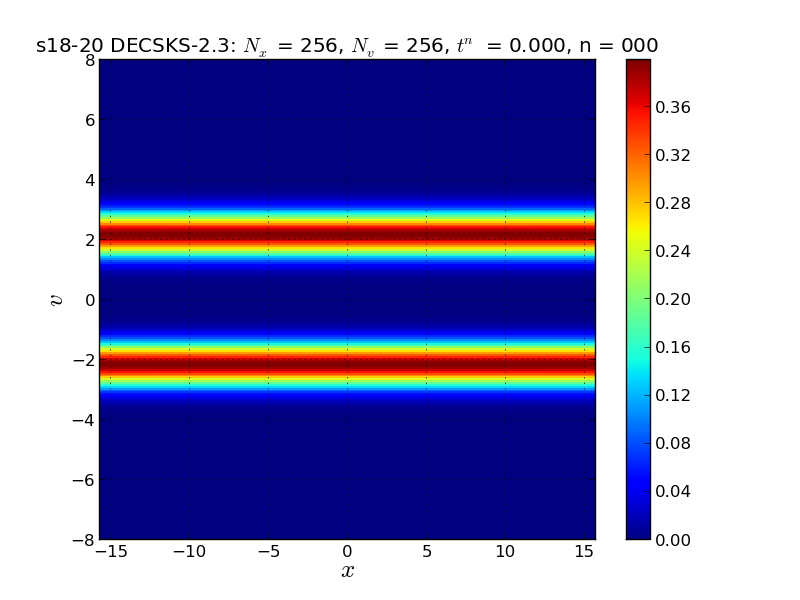

In [5]:
from IPython.display import Image
Image(filename='./fig/s18-20_plot_-_1D1V_electron_O6-4_Nx256Nv256Nt100_it00000.png')

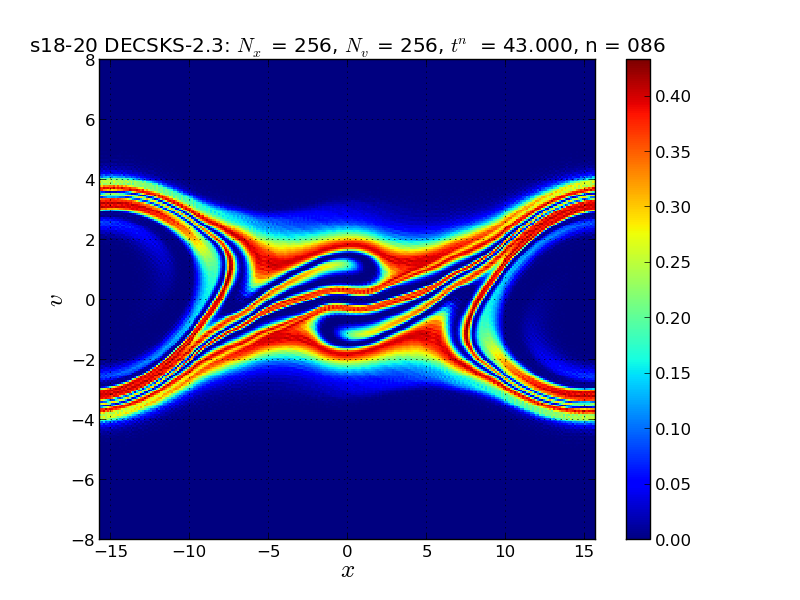

In [7]:
from IPython.display import Image
Image(filename='./fig/s18-20_plot_-_1D1V_electron_O6-4_Nx256Nv256Nt100_it00086.png')

## electrons at selected times for $v_{the} = 0.0625$ (s18-20b)

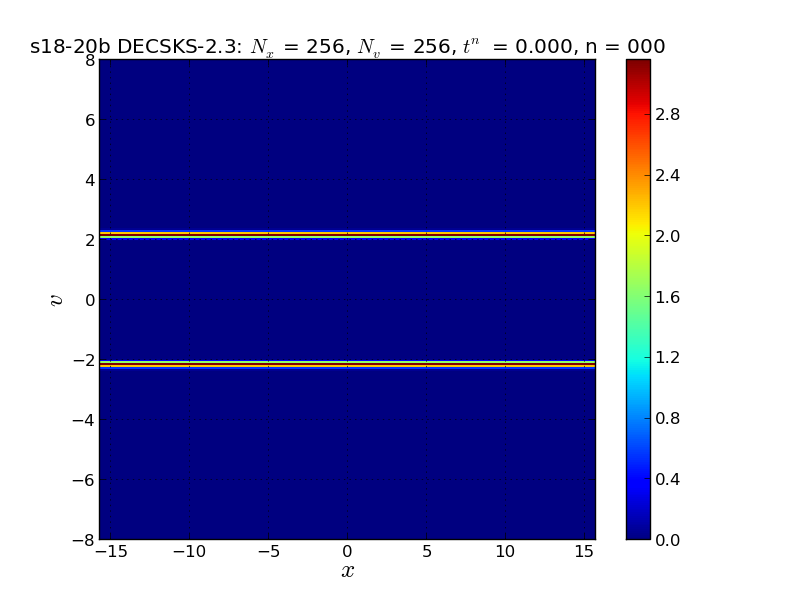

In [8]:
from IPython.display import Image
Image(filename='./fig/s18-20b_plot_-_1D1V_electron_O6-4_Nx256Nv256Nt100_it00000.png')

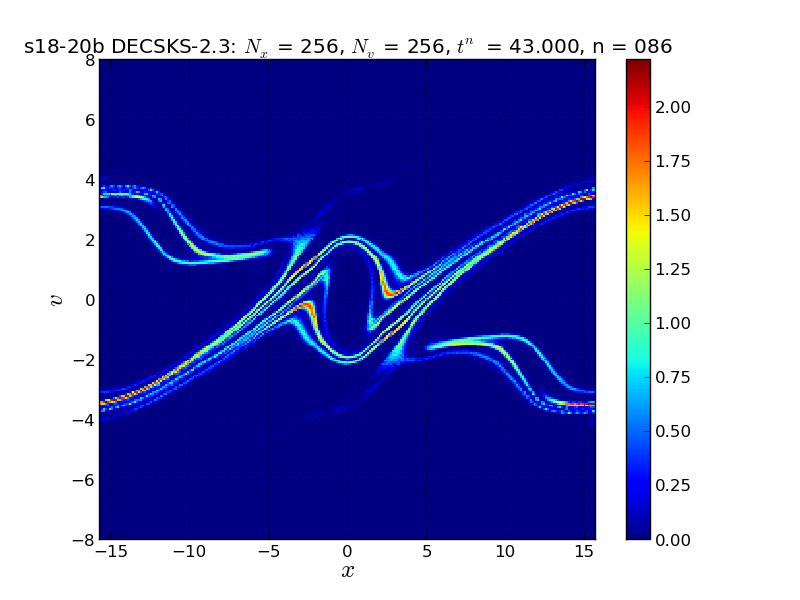

In [9]:
from IPython.display import Image
Image(filename='./fig/s18-20b_plot_-_1D1V_electron_O6-4_Nx256Nv256Nt100_it00086.png')

## electrons at selected times for $v_{the} = 0.03125$ (s18-20c)

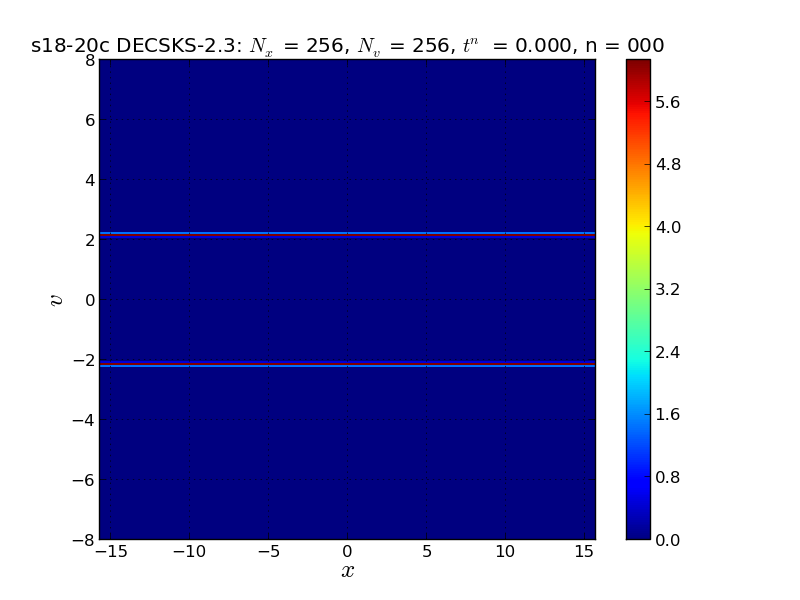

In [1]:
from IPython.display import Image
Image(filename='./fig/s18-20c_plot_-_1D1V_electron_O6-4_Nx256Nv256Nt100_it00000.png')

The above is during the linear growth phase

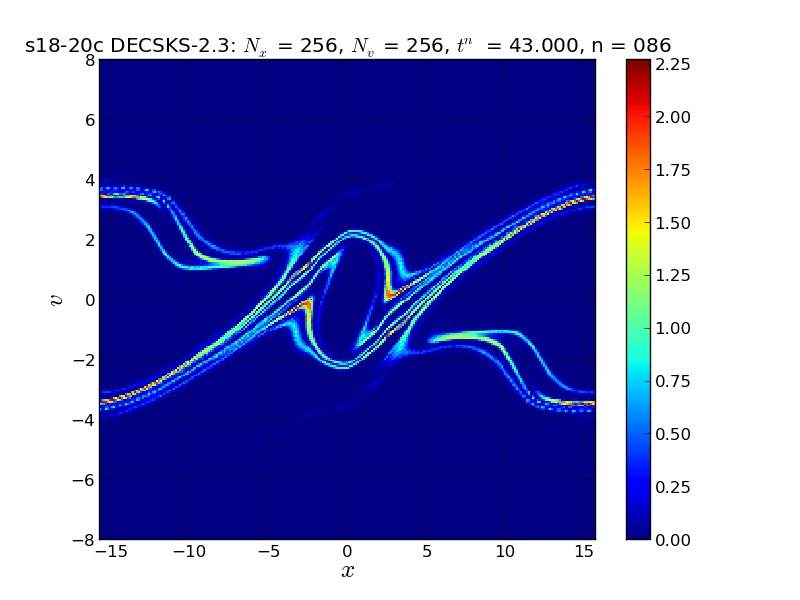

In [4]:
from IPython.display import Image
Image(filename='./fig/s18-20c_plot_-_1D1V_electron_O6-4_Nx256Nv256Nt100_it00086.png')

The above is a snapshot after the linear growth rate and some suggestions of steady state is apparent.

We see the growth on a plot of the electrostatic energy, where we report three cases of thermal velocities $v_{the}$.

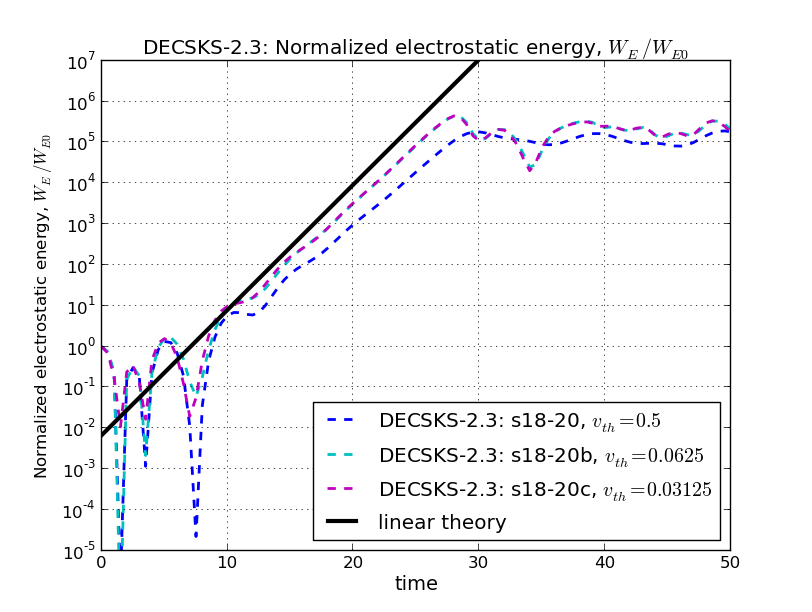

In [5]:
from IPython.display import Image
Image(filename='./fig/WE_s18-20.png')

This agrees very well with the work from Banks [J. Banks and J. Hittinger, A new class of nonlinear finite-volume methods for
vlasov simulation, Plasma Science, IEEE Transactions on, 38 (2010), pp. 2198–2207], whose Vlasov-Poisson solver evolved electrons on a constant ion background, and uses and artificial viscosity to assuage the aliasing problem in numerical energy injection in their finite volume scheme (compare fig. 9 in their paper).

This also agrees well with Qiu et. al's high order SL WENO non-splitting 6th order LTE solver [arXiv:1602.08663 [math.NA], Fig. 3.7]

## tracking of conserved quantities

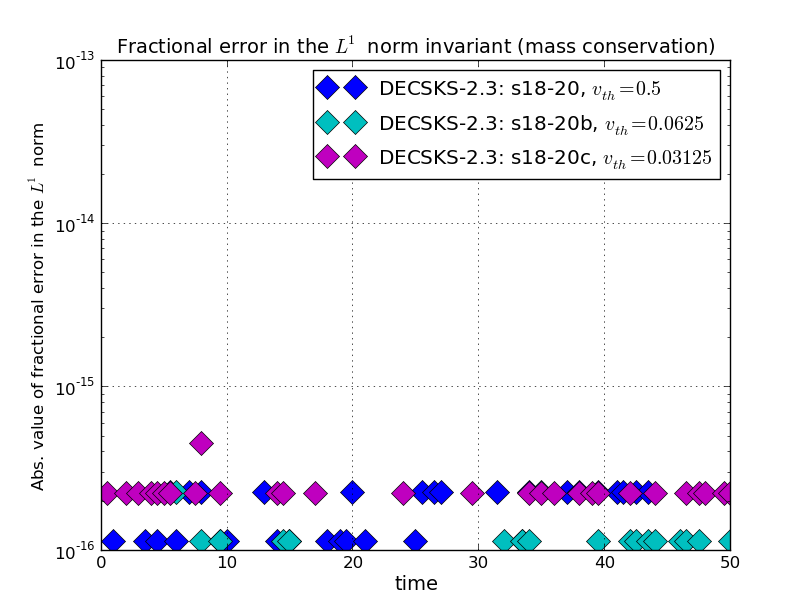

In [6]:
from IPython.display import Image
Image(filename='./fig/I1_s18-20.png')

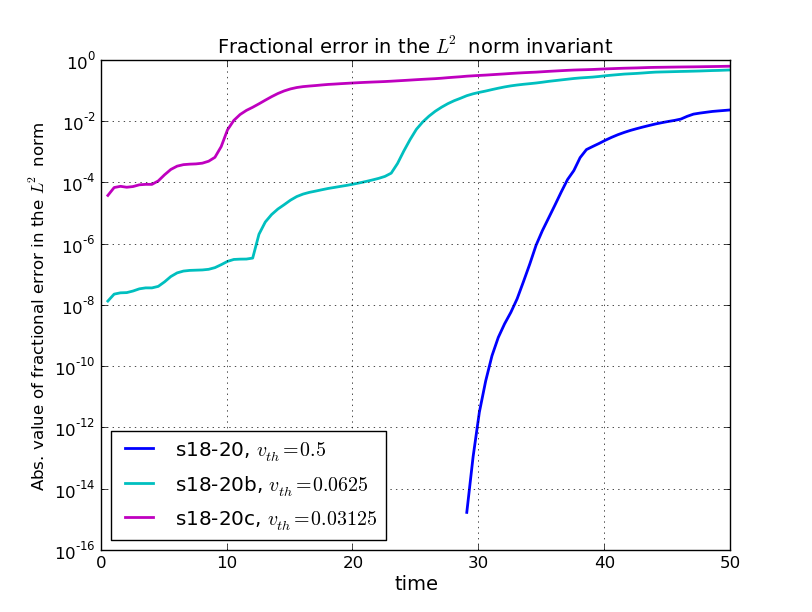

In [7]:
from IPython.display import Image
Image(filename='./fig/I2_s18-20.png')

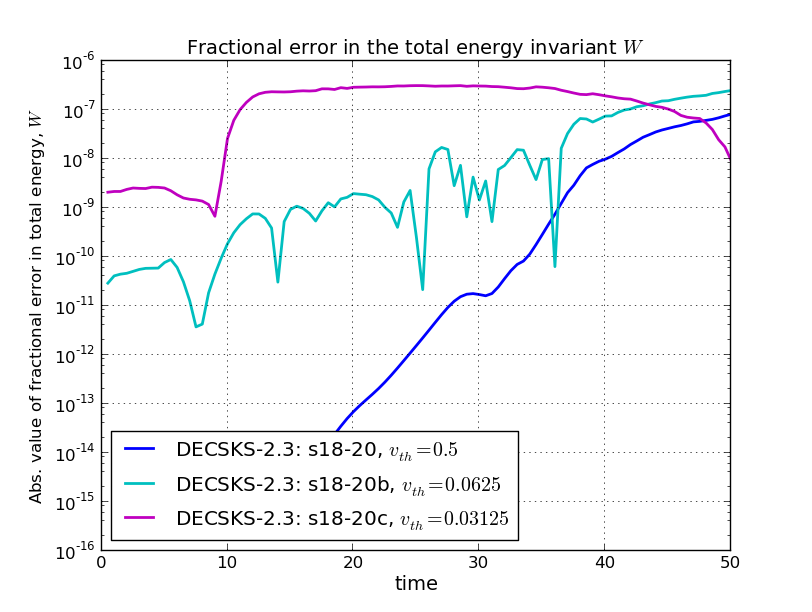

In [8]:
from IPython.display import Image
Image(filename='./fig/W_s18-20.png')

ion energies neglected above

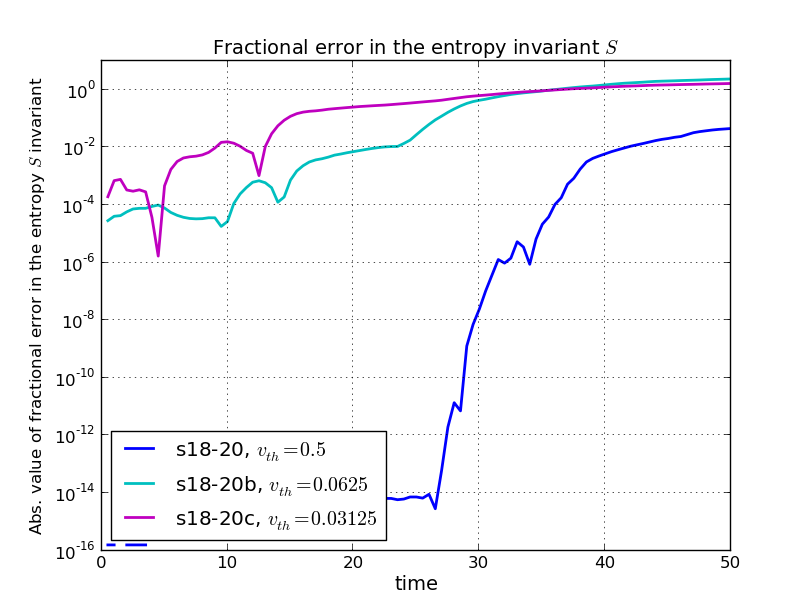

In [9]:
from IPython.display import Image
Image(filename='./fig/IS_s18-20.png')

Since mass conservation is inherent in this semi-Lagrangian solver, we have the $L^1$ norm conserved well as usual, though sharper distributions challenge it significantly as can be seen, though it still is conserved with $10^{-15}$. The entropy, $L^1$ and total energy are conserved about an order of magnitude better than what has been seen by this author in literature as well.

# collector-collector problem, $x$-nonperiodic, $v_x$-periodic

We set up a problem with both boundaries being thick conductors permitting to be at a floating potential according with the charge collected at each surface (cf. s18 part 2 notebook). In order to not "lose track" (account of) particles, we permit $v_x$ to have periodic boundary conditions. We do not set up s18-07 in particular, but instead consider the similar setup:

    s18-21:
    
        Nx = 256
        ax = -10
        bx = 10
        
        Nvx = 256
        avx = -8.0
        bvx = 8.0
        
        electron density: cosine 22-bell  (centered at (x,v_x) = (-5, 2))
        ion density:      ion cosine 22-bell (centered at (x,v_x) = (5, -2))
        
        phase space solver LTE = 8
        corrections on x: fd
        corrections on vx: fourier
        
        split scheme: LF2
        
recall we cannot use split schemes with negative time steps in bounded problems as this is unphysical.
        
Since particles are lost, we do not have invariance in $L^1$, $L^2$, or $S$. An invariant we can track still is total energy, since while we absorb the particles at each wall, we log their charge information as they are collected so all charge is accounted for in DECSKS. The total energy is as before:

$$I_W = \frac{1}{2}\sum_{i} \left(\sum_j f_{elec; i,j} v_{x,j}^2 \Delta v_x\right) \Delta x + \frac{1}{2}\sum_{i} \left(\sum_j f_{ion; i,j} v_{x,j}^2 \Delta v_x\right) \Delta x + \frac{1}{2}\sum_i E_{i}^2$$

In this case, we have accelerated ions that are extremely localized in phase space. Since from one time step to the next, there are not equal numbers at equal velocities, and further they are accelerated to faster speeds than in previous simulations, we will definitely need to factor them in ion energy contributions.

## total energy history

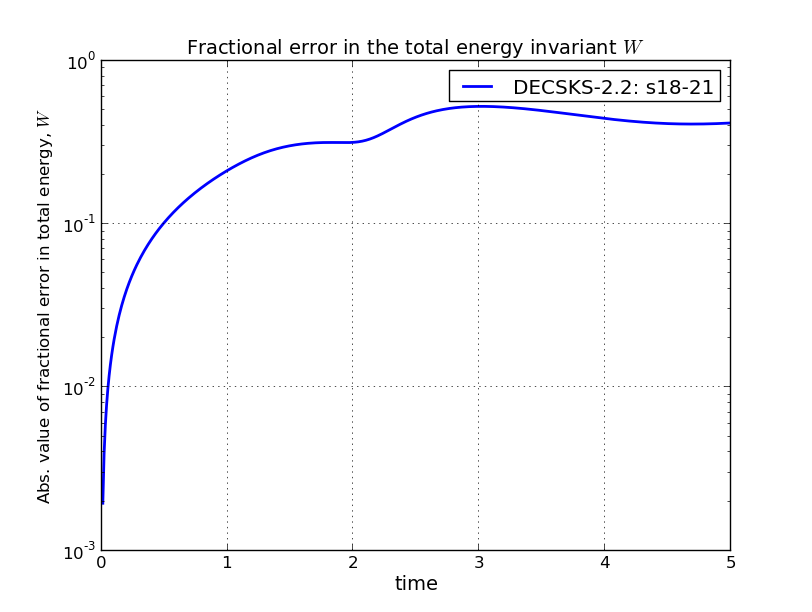

In [24]:
from IPython.display import Image
Image(filename='./fig/W_s18-21.png')

Which does not conserve total energy very well.

## change in the $L^1$ norm (mass) for electrons

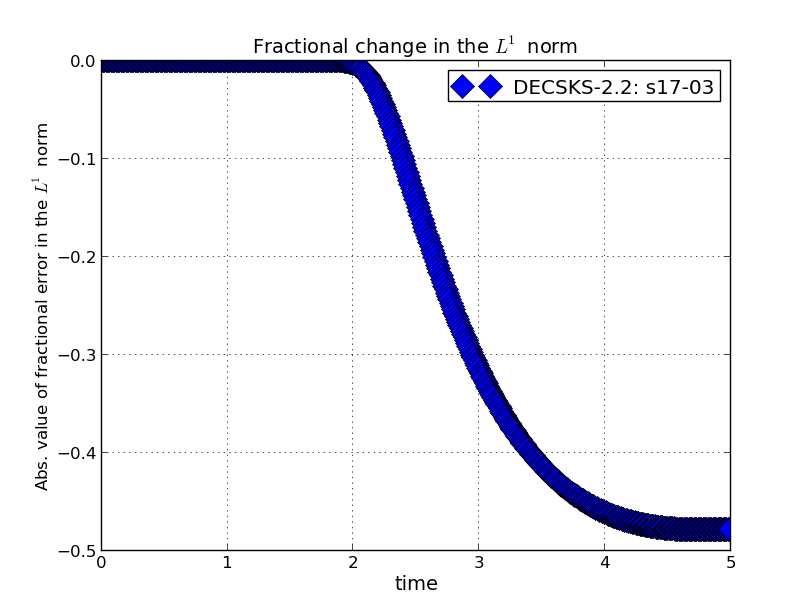

In [25]:
from IPython.display import Image
Image(filename='./fig/I1_s18-21.png')

The mass lost (above) will mirror the charge density accumulation on the right wall (see below) since few, if any, ions reach this wall during the simulation.

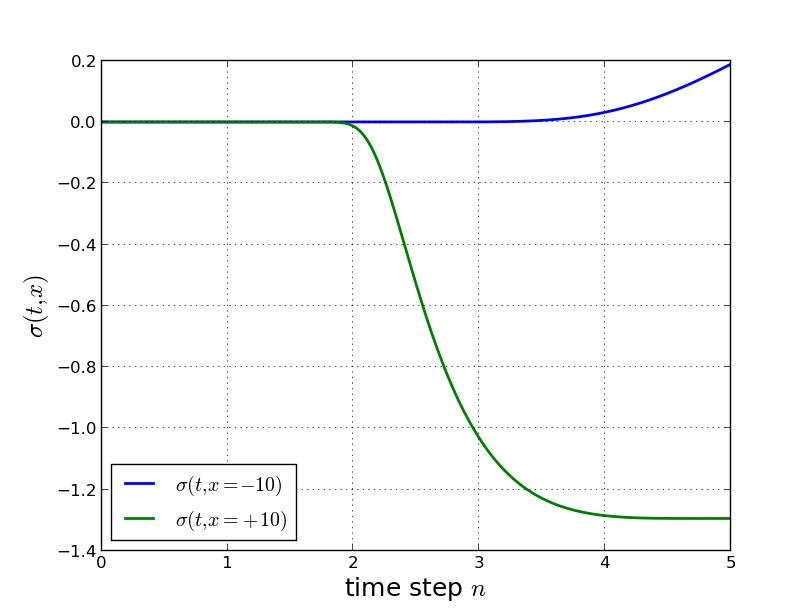

In [2]:
from IPython.display import Image
Image(filename='./fig/sigma_s18-21.png')

TODO: We consider a less demanding simulation and analyze energy, with ions and electrons more dispersed rather than the localized blobs we try here next.